#  Project description
You work for the online store Ice, which sells videogames all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. 
In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.



## Initialization


In [32]:
!pip install sidetable

In [33]:
# Loading all the libraries
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
import warnings

## Step 1. Open the data file and study the general information

In [34]:
#Load the data files into different DataFrames
try:
    data = pd.read_csv('moved_games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [35]:
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [36]:
# Print the general information about the data DataFrame
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


So, we have 16713 rows of data in 11 columns, some of them have missing values. b

In [37]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [38]:
data.describe(include=['object'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


The majority of columns contain numerical variables, 5 columns have categotical variables. Let's prepare the data for the future analysis.

# Step 2. Prepare the data

## Make colomn names lowercase.

In [39]:
data.columns = data.columns.str.lower()
data.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN


## Convert the data to the required types.

Values in name, platform, genre columns are strings,and na_sales, eu_sales, jp_sales, other_sales are floats - that's ok.

Year of release and critic score values are floats, but should be integers.  They can't now be transformed to integers because of NaNs. If we later fill up Nans with some integer, we could change datatype from float to int.

User_score values are object type now, but should be floats. Let's take a look at them:


In [40]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Values are mixed(int and str) now because of 'tbd', it is short for 'to be determined'. Let's examin tbd values.

In [41]:
tbd=data.query('user_score == "tbd"')
tbd

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [42]:
tbd.year_of_release.value_counts()

2009.0    405
2010.0    331
2008.0    326
2011.0    217
2002.0    192
2007.0    192
2006.0    124
2005.0    121
2004.0    107
2003.0     95
2001.0     82
2000.0     43
2015.0     38
2016.0     34
2012.0     24
2014.0     21
2013.0     15
1999.0      8
1997.0      1
Name: year_of_release, dtype: int64

tbd values are scattered across all years, different genre, critic score and rating values, and seem like random. Maybe in the past someone planned to gather additional information for these games, but didn't come back to the dataset and tbd remained in the data. For now tbd are actually missing values. Let's replace tbd with Nan for data consistansy, and datatype will change to float.

In [43]:
data.user_score=pd.to_numeric(data['user_score'], errors = 'coerce')
data.user_score

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float64

tbd were changed to NaN.
Now all values in user_score are floats.

## Missing values

Let's check missing values in all columns:

In [44]:
data.stb.missing(style=True)

,missing,total,percent
user_score,"9,125","16,715",54.59%
critic_score,"8,578","16,715",51.32%
rating,"6,766","16,715",40.48%
year_of_release,269,"16,715",1.61%
name,2,"16,715",0.01%
genre,2,"16,715",0.01%
platform,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%


Only 5 columns are ok, other columns have from 0.01 to 51.32% of missing values. Let's begin with addressing them in ascending order.

### Name, Genre

Name and genre have only 2 Nans each, let's check if they are in the same rows.

In [45]:
data.query('name.isna() & genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Yes, games are the same. There's information about platform and year of release, let's check if we can restore name and genre.

In [46]:
data.query('platform == "GEN" & year_of_release == 1993')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


There are many different names and years, so we can't restore missing name and genre for these rows. These are rather old games, their name, genre, critic_score, user_score and rating are unknown, so if we just drop them we don'l lose much.

In [47]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [48]:
data.dropna(subset=['name'], inplace=True)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Year of Release

269 values are missing, let's see if we can restore any of them from name and platform.

In [49]:
year_na=data.query('year_of_release.isna()')
year_na

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [50]:
year_na.name.nunique()

232

There are 232 unique game names in 269 rows witn missing year values. If these games are mentioned with years in other rows of data, we may use it for filling Nans.

In [51]:
name_year=data.groupby(['name','platform'])['year_of_release'].agg(['median','count']).reset_index()
name_year

,name,platform,median,count
0,Beyblade Burst,3DS,2016.0,1
1,Fire Emblem Fates,3DS,2015.0,1
2,Frozen: Olaf's Quest,3DS,2013.0,1
3,Frozen: Olaf's Quest,DS,2013.0,1
4,Haikyu!! Cross Team Match!,3DS,2016.0,1
...,...,...,...,...
16704,uDraw Studio,Wii,2010.0,1
16705,uDraw Studio: Instant Artist,Wii,2011.0,1
16706,uDraw Studio: Instant Artist,X360,2011.0,1
16707,wwe Smackdown vs. Raw 2006,PS2,NaN,0


In majority of cases there is 1-to-1 correspondense between game name and year of release.
Let's fill missing years with those for game's name with transform method

In [52]:
data['year_of_release']=data['year_of_release'].fillna(data.groupby(['name'])['year_of_release'].transform('median'))
data['year_of_release'].isna().sum()
                                                  

146

We restored some years, but 146 of 269 missing years are left for unique game names. Let's delete these rows.

In [53]:
data.dropna(subset=['year_of_release'], inplace=True)
data['year_of_release']

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16710    2016.0
16711    2006.0
16712    2016.0
16713    2003.0
16714    2016.0
Name: year_of_release, Length: 16567, dtype: float64

### Critic_score, user_score

Critic_score should be integer from 1 to 100 and user_score shoud be float from 1 to 10, but there are 51% and 55% of NaNs. We can't derive or restore these missing values, because they are not determined by any other parameter in the data. They also can't be replaced by mean/median values for some group.

In [54]:
data.query('critic_score.isna() or user_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In majority of cases  Nans for critic_score and for User_score go in the same rows, but they are independent on each otner or on any other column. Filling them may harm our future analysis, so let's leave them as they are.

### Rating

In [55]:
data.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Rating values are strings(object):

EC - Early Childhood,
E - everyone
E10+ - for ages 10 and older
T - Teenager
M - Mature(17+)
RP - Rating Pending for games aawaiting final rating, only in advertising prior to a game's release.
AO - Adults only
K-A - Kids to Adults, the same as E10+, used until 1998

Let's replace K-A with E10+ foor data consistency.

In [56]:
data.rating = data.rating. replace('K-A','E10+')
data.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Check missing ratings:

In [57]:
data.query('rating.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [58]:
data.query('rating.isna()').name.nunique()

5787

We could analyze these 5852 names and find more or less 'childish', but that would not give exact rating.

Maybe genre could help?

In [59]:
data.groupby(['genre'])['rating'].value_counts()

genre         rating
Action        T          675
              M          604
              E10+       481
              E          414
              AO           1
              EC           1
Adventure     E          159
              T          115
              M           98
              E10+        67
              EC           2
Fighting      T          360
              M           49
              E10+        19
              E            8
Misc          E          453
              T          233
              E10+       167
              M           13
              EC           5
Platform      E          354
              E10+       142
              T           63
              M            3
Puzzle        E          288
              E10+        42
              T           10
Racing        E          581
              T          169
              E10+        96
              M           18
              RP           1
Role-Playing  T          416
              M       

Genre can't predict rating too.

Let's replace missing values with 'unknown'.

In [60]:
data.rating = data.rating.fillna('unknown')
data.rating.unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [61]:
data.stb.missing(style=True)

,missing,total,percent
user_score,"9,027","16,567",54.49%
critic_score,"8,492","16,567",51.26%
name,0,"16,567",0.00%
platform,0,"16,567",0.00%
year_of_release,0,"16,567",0.00%
genre,0,"16,567",0.00%
na_sales,0,"16,567",0.00%
eu_sales,0,"16,567",0.00%
jp_sales,0,"16,567",0.00%
other_sales,0,"16,567",0.00%


##  Total sales for column

Let's calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [62]:
data['total_sales']=data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


**Conclusion** 

The data was prepared for further analysis. Column names were made lowercase, values in user score were converted to floats('tbd' was treated like missing value). Missing  year of release  were restored where possible(about 125 gamess), the rest were deleted with rows. Missing ratings were filled with 'unknown', all missing values in critic_score and user_score were left without changing. Two rows of data where even name and genre of the game were missing were deleted.


# Step 3. Analyze the data
## How many games were released in different years.
Is the data for every period significant?

In [63]:
df=data[['year_of_release','name']].groupby(['year_of_release'])['name'].nunique().reset_index()
df

,year_of_release,name
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


Let's take only data for non-missing years: 

In [64]:
df=df[df['year_of_release']!=0]
df

,year_of_release,name
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


Number of games per year changes significantly. Let's plot a lollypop graph for it.

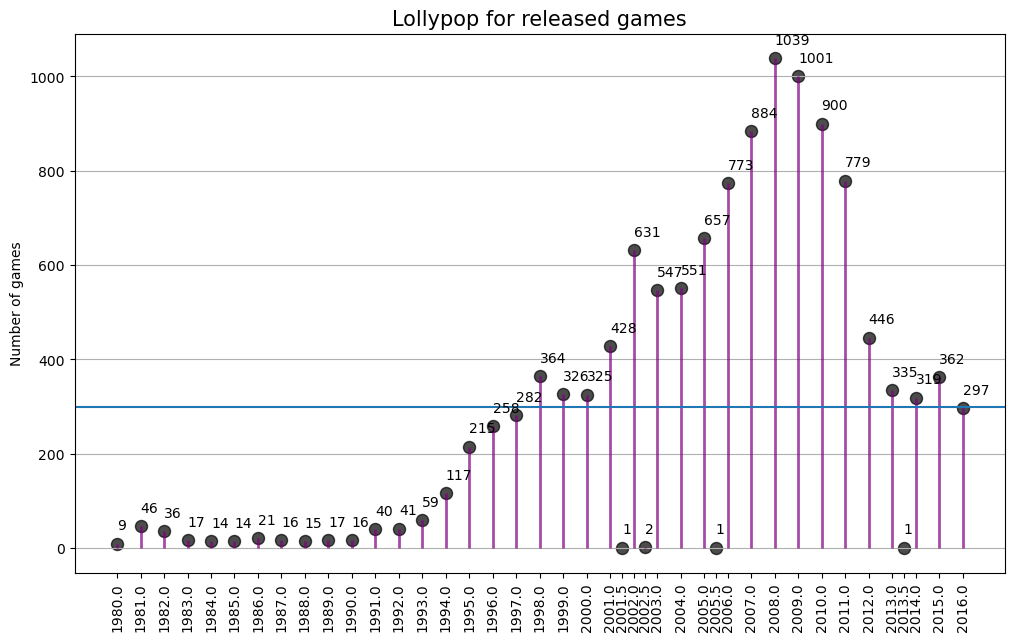

In [65]:
fig,ax=plt.subplots(figsize=(12,7))
ax.grid(axis='y')
ax.vlines(x=df.year_of_release, ymin=0, ymax=df.name, color='purple', alpha=0.7, linewidth=2)
ax.scatter(x=df.year_of_release,y=df.name, s=75, color='black',alpha=0.7)

ax.set_title("Lollypop for released games", fontdict={'size':15})
ax.set_ylabel('Number of games')
ax.set_xticks(df.year_of_release)
ax.set_xticklabels(df.year_of_release,rotation=90)
ax.axhline(y=300)

for row in df.itertuples():
    ax.text(row.year_of_release, row.name+30,s=row.name)
plt.show()

Number of games per year grew since 1993 and reached maximum in 2008, after that began to go down. The last years the picture on the market changed cignificantly, so old data are not so relevant. The most important years to predict the sitution in 2017 are since 2013.

##  How sales varied from platform to platform?
Choose the platforms with the greatest total sales and build a distribution based on data for each year.¶

In [66]:
df=data[['platform','total_sales']].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()
df

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


Total sales vary a lot from platform to platform. Let's calculate z-score: subtract the mean from total_sales value and devide by standard deviation:

In [67]:
df['sales_z']=(df['total_sales']-df['total_sales'].mean())/df['total_sales'].std()

In [68]:
df['color']=['red' if x<0 else 'green' for x in df['sales_z']]
df

,platform,total_sales,sales_z,color
0,PCFX,0.03,-0.825633,red
1,GG,0.04,-0.825604,red
2,3DO,0.10,-0.825431,red
3,TG16,0.16,-0.825257,red
4,WS,1.42,-0.821621,red
5,NG,1.44,-0.821563,red
6,SCD,1.86,-0.820351,red
7,DC,15.95,-0.779688,red
8,GEN,28.35,-0.743902,red
9,SAT,33.59,-0.728780,red


Let's make a plot for normalized total sales per platform.

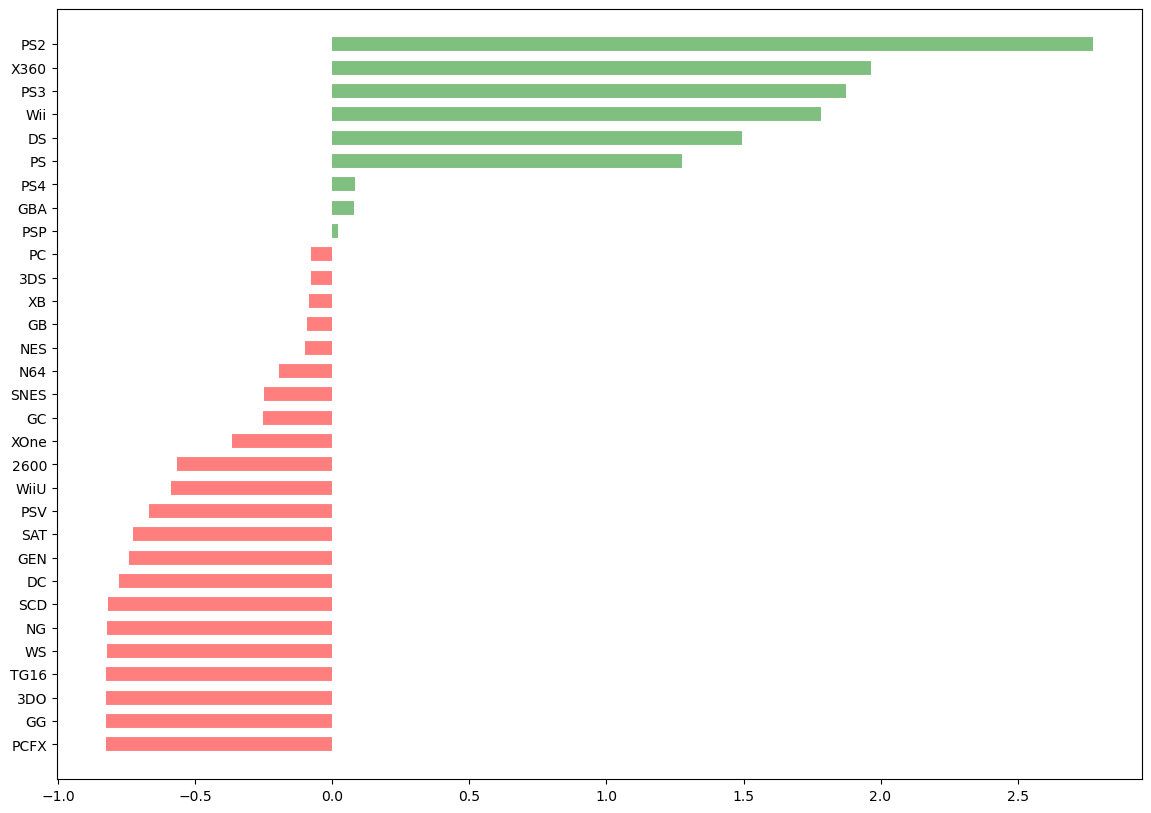

In [69]:
plt.figure(figsize=(14,10))
plt.hlines(y=df.platform,xmax=df.sales_z, xmin=0, color=df.color, alpha=0.5, linewidth=10)

0 represents the mean, so the longer green bar is - the more platform's total sales are above the mean.
Red bars are the longest for platforms with total sales much lower than the mean.

PC2 is the leader in total_sales, X360 and PC3 come next. Let's examine their sales dynamics from year to year.

In [70]:
df=data.query('(year_of_release !=0)&((platform=="PS2")| (platform =="X360")|(platform=="PS3"))').groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()
df

,year_of_release,platform,total_sales
0,2000.0,PS2,39.17
1,2001.0,PS2,166.43
2,2002.0,PS2,208.36
3,2003.0,PS2,193.05
4,2004.0,PS2,212.76
5,2005.0,PS2,160.66
6,2005.0,PS3,0.19
7,2005.0,X360,9.22
8,2005.5,PS2,0.25
9,2006.0,PS2,103.99


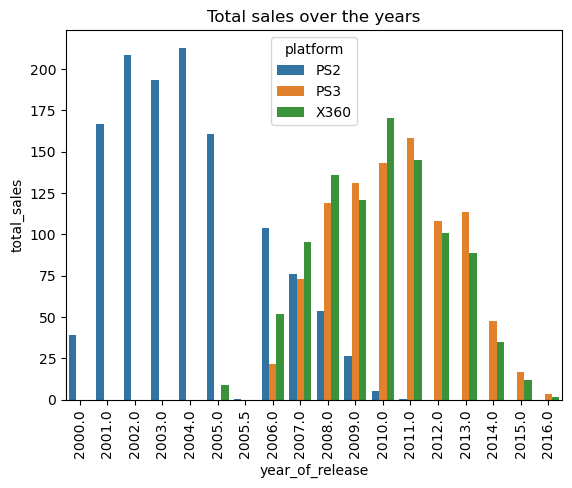

In [71]:
plot=sns.barplot(data=df, x="year_of_release", y="total_sales", hue="platform")
plot.set(title="Total sales over the years")
plot.tick_params(axis='x', rotation=90)

**So**, the leaders in total sales are PS2, X360, PS3. Their distribution based on data per each year was analysed. PS2 has max total sales for the whole observation period, but it lost pupularity and is now out of sale. Then other platforms arise(new generation) and get more total sales. Each game has its own 'life cycle'. X360 and PS3 belong to the same generation.

## Platforms that used to be popular but now have zero sales.
How long does it generally take for new platforms to appear and old ones to fade?


In [72]:
df=data[data.year_of_release>=2000]

We exclude really old models(released before 2000), group data by platform and find min and max values for year of release.

In [73]:
df_age=df.groupby(['platform'])['year_of_release'].agg(['min','max']).reset_index()
df_age

,platform,min,max
0,3DS,2000.0,2016.0
1,DC,2000.0,2008.0
2,DS,2004.0,2013.0
3,GB,2000.0,2001.0
4,GBA,2000.0,2007.0
5,GC,2001.0,2007.0
6,N64,2000.0,2004.0
7,PC,2000.0,2016.0
8,PS,2000.0,2003.0
9,PS2,2000.0,2011.0


Differense between max and min values gives model's "age"

In [74]:
df_age['age']=df_age['max']-df_age['min']

In [75]:

df_age.sort_values(by='min')

,platform,min,max,age
0,3DS,2000.0,2016.0,16.0
14,WS,2000.0,2001.0,1.0
18,XB,2000.0,2008.0,8.0
8,PS,2000.0,2003.0,3.0
7,PC,2000.0,2016.0,16.0
6,N64,2000.0,2004.0,4.0
9,PS2,2000.0,2011.0,11.0
4,GBA,2000.0,2007.0,7.0
3,GB,2000.0,2001.0,1.0
1,DC,2000.0,2008.0,8.0


In [76]:
df_age['age'].median()

7.5

So most often platforms live for about 7.5 years, though some most popular models live up to 16 years.

Let's plot distribution of all models' total_sales over the years.

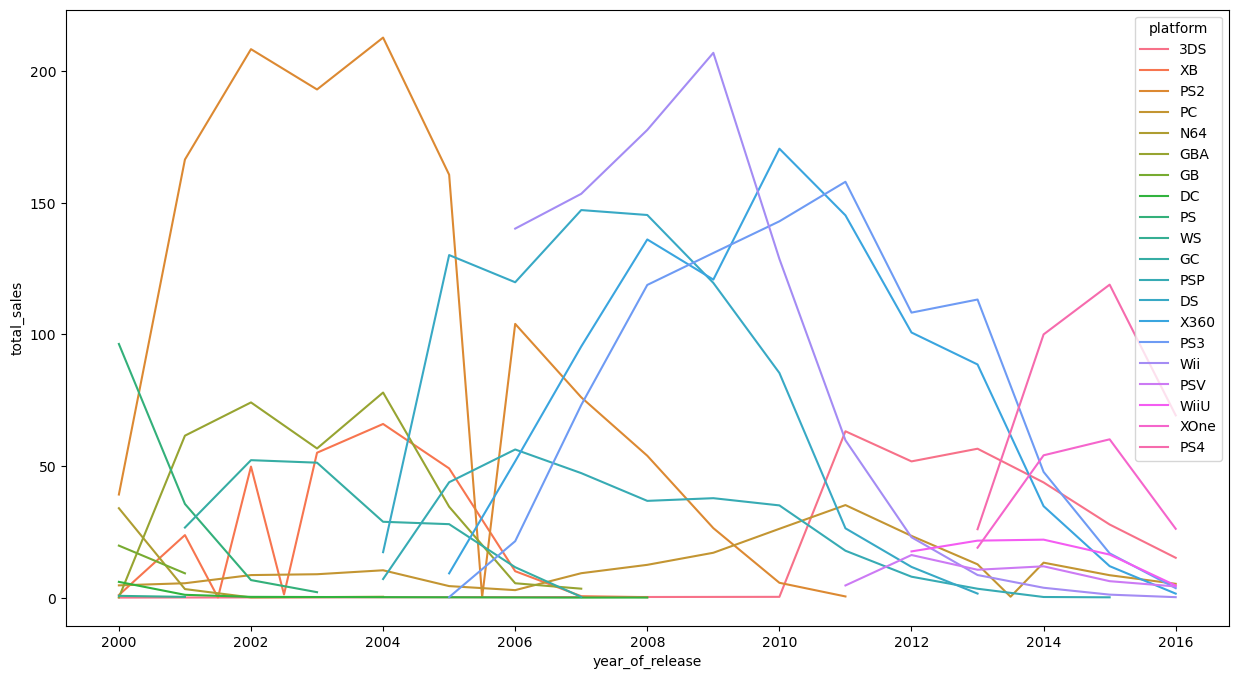

In [77]:
df=df.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release')

plt.figure(figsize=(15,8))
ax = sns.lineplot(data=df, x="year_of_release", y="total_sales",hue="platform")


We see short lines for some unhappy platforms and long lines for popular successful platforms going up and down. Older models have nothing to do with current situation.

**So** , platform "age" was determined as differense between its max and min value for year of release. Most often platforms live for about 7.5 years, though some most popular platforms live up to 16 years. Distribution of all platforms' total_sales over the years was visualised with lineplot. Older platforms are no more relevant for current market situation.

##  What period is significant for 2017 prognosis. 
Look at your answers to the previous questions. 

To build a prognosis for 2017 we don't need data about all models -  relevant models were released in 2013 and later. Let's make a new dataset for them.

In [78]:
data_new=data[data.year_of_release>=2013]
data_new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [79]:
data_new.stb.missing(style=True)

,missing,total,percent
critic_score,"1,243","2,237",55.57%
user_score,"1,042","2,237",46.58%
name,0,"2,237",0.00%
platform,0,"2,237",0.00%
year_of_release,0,"2,237",0.00%
genre,0,"2,237",0.00%
na_sales,0,"2,237",0.00%
eu_sales,0,"2,237",0.00%
jp_sales,0,"2,237",0.00%
other_sales,0,"2,237",0.00%


We still have missing values in 2 columns.

## Which platforms are leading in sales? 
Which ones are growing or shrinking? Select several potentially profitable platforms.

In [80]:
df=pd.pivot_table(data_new,index='year_of_release',columns='platform',values='total_sales',aggfunc='sum',fill_value=0)
df

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013.0,56.57,1.54,12.66,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2013.5,0.00,0.00,0.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2014.0,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


The pivot table shows total sales per platform per year.  In  2013 PS3 and X360 were leading in sales, in 2014 PS4 pulled ahead and remained the leader  in 2015 and 2016.

To find yearly difference in sales, let's shift rows 1 step ahead.

In [81]:
df.shift(+1)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013.5,56.57,1.54,12.66,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014.0,0.00,0.00,0.35,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2015.0,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2016.0,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14


Subtract df.shift(+1) from df. So we find delta between neibouring years. Store it in dynamics dataframe.

In [82]:
dynamics=(df-df.shift(+1)).T
dynamics


year_of_release,2013.0,2013.5,2014.0,2015.0,2016.0
platform,,,,,
3DS,NaN,-56.57,43.76,-15.98,-12.64
DS,NaN,-1.54,0.00,0.00,0.00
PC,NaN,-12.31,12.93,-4.76,-3.27
PS3,NaN,-113.25,47.76,-30.94,-13.22
PS4,NaN,-25.99,100.00,18.90,-49.65
PSP,NaN,-3.38,0.24,-0.12,-0.12
PSV,NaN,-10.59,11.90,-5.65,-2.00
Wii,NaN,-8.59,3.75,-2.61,-0.96
WiiU,NaN,-21.65,22.03,-5.68,-11.75


Negative values appear when sales go down, positive values appear when sales grow. Let's use heatmap to visualize dynamics.

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

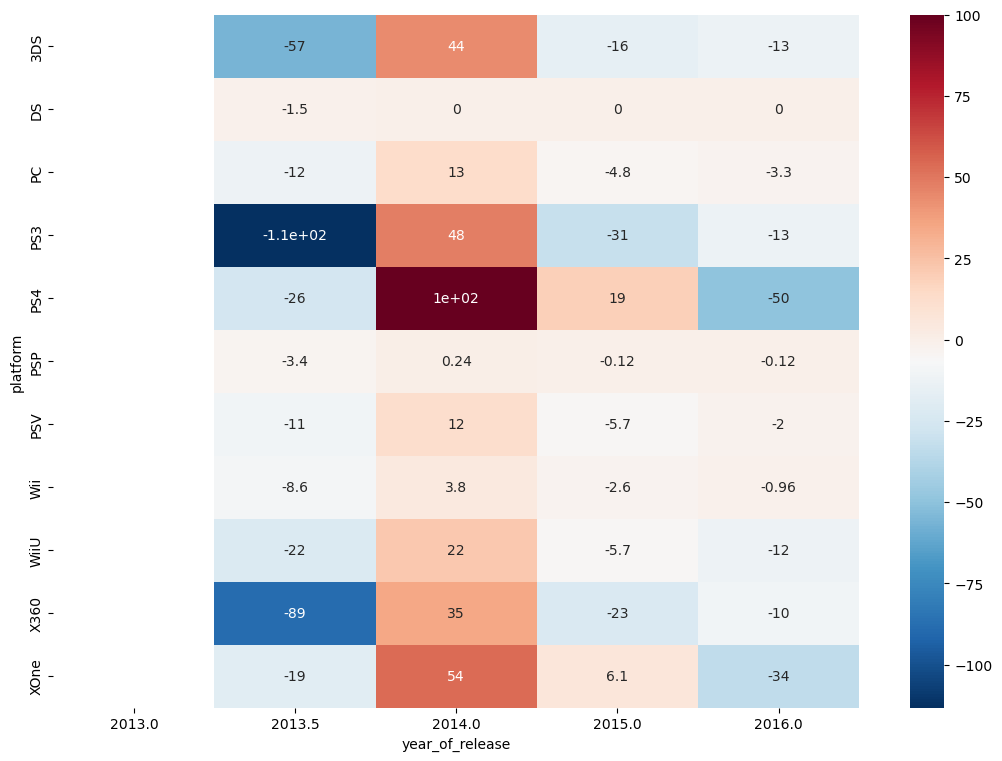

In [83]:
plt.figure(figsize=(13,9))
sns.heatmap(dynamics, cmap='RdBu_r', annot=True)

We clearly see max increase in total sales for PS4 in 2014(+74), and in 2016 PS4 has max decrease(-50). Everything changes wery quickly! But some platform are more stable, fluctute around 0 (PSP,PSV).

There are no platforms with positive dynamics in 2016(the whole market is shrinking), so we have to choose between degrees of decrease. Potentially profitable platforms are  DS(two years of 0 dynamics), PSP, Wii, PSV.

**So**, for platforms released in 2013 and later total sales per year were examined.  In 2013 PS3 and X360 were leading in sales, in 2014 PS4 pulled ahead and remained the leader  in 2015 and 2016. Difference between years was found that shows positive or negative dynamics in sales, heatmap was plotted. In 2016 there are no platforms with positive dynamics. Potentially profitable platforms are DS (two years of 0 dynamics), PSP, Wii, PSV.

## Build a box plot for the global sales of each game, broken down by platform. 
Are the differences in sales significant? What about average sales on various platforms? Describe your findings.¶

Let's group data by name for each platform and compare total_sales and save in grouped df.

In [84]:
grouped=data_new.groupby(['platform','name'])['total_sales'].sum().reset_index()
grouped

,platform,name,total_sales
0,3DS,Beyblade Burst,0.03
1,3DS,Fire Emblem Fates,1.67
2,3DS,Frozen: Olaf's Quest,0.59
3,3DS,Haikyu!! Cross Team Match!,0.04
4,3DS,12-Sai. Honto no Kimochi,0.07
...,...,...,...
2232,XOne,XCOM 2,0.04
2233,XOne,ZombiU,0.01
2234,XOne,Zombie Army Trilogy,0.11
2235,XOne,Zoo Tycoon (2013),0.36


In [85]:
df=data_new.groupby(['name', 'platform'])['total_sales'].agg(['count','sum']).reset_index()
df

,name,platform,count,sum
0,Beyblade Burst,3DS,1,0.03
1,Fire Emblem Fates,3DS,1,1.67
2,Frozen: Olaf's Quest,3DS,1,0.59
3,Frozen: Olaf's Quest,DS,1,0.51
4,Haikyu!! Cross Team Match!,3DS,1,0.04
...,...,...,...,...
2232,Zumba Fitness: World Party,Wii,1,0.23
2233,Zumba Fitness: World Party,XOne,1,0.24
2234,Zyuden Sentai Kyoryuger: Game de Gaburincho!!,3DS,1,0.05
2235,htoL#NiQ: The Firefly Diary,PSV,1,0.01


Too many numbers are difficult to compare. To visualize the distribution we may use boxplot.

Let's order plarforms by total sales and set showfliers to False

In [86]:
order=grouped.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales')['platform']
order

1       DS
5      PSP
7      Wii
6      PSV
2       PC
8     WiiU
9     X360
0      3DS
10    XOne
3      PS3
4      PS4
Name: platform, dtype: object

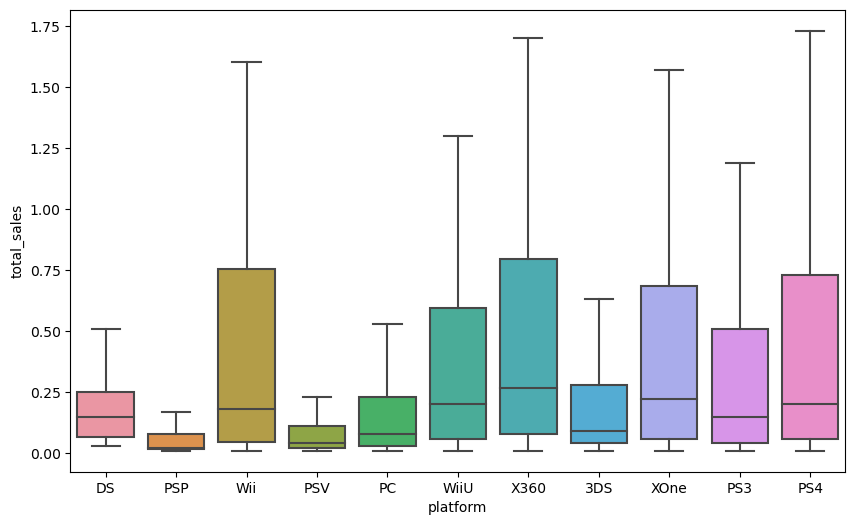

In [87]:
plt.figure(figsize=(10,6))
sns.boxplot(x='platform',y='total_sales',data=grouped,order=order,showfliers = False)
plt.show()

**So**, the boxplot visualises total sales for games on each platform. Differences in sales between platforms are significant, as we see by box hight(IQR) and the median. Judging by median line the most successful are games on X360 platform, than come XOne and WiiU. Individual differences between games are very big, there are many upper outliers. 

##  How user and professional reviews affect sales for a particular popular platform.
Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

Let's take PS4 platform and save its scores and total sale in a separate dataset.

In [88]:
data_new.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27


In [89]:
PS4_cr=data_new[(data_new.platform=="PS4")&(data_new.critic_score.notna())][['critic_score','total_sales']]
PS4_cr.head()

,critic_score,total_sales
42,97.0,12.62
77,82.0,8.58
92,83.0,7.66
94,85.0,7.60
105,87.0,7.17


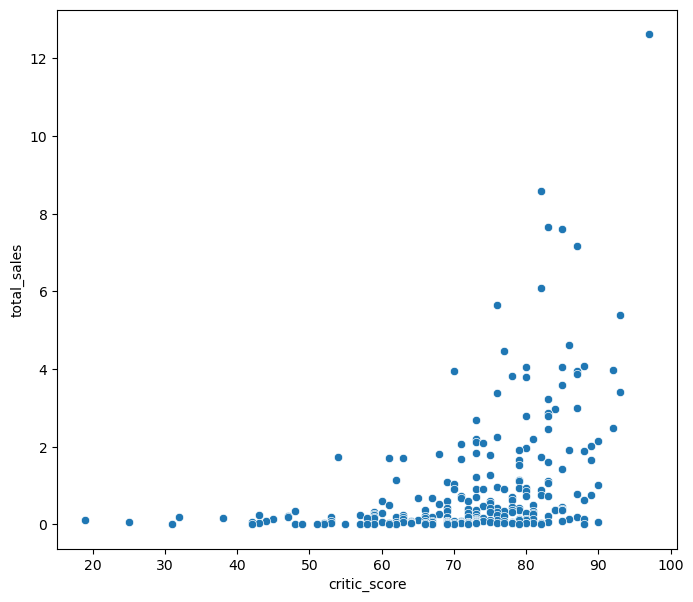

In [90]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.scatterplot(data=PS4_cr, x='critic_score', y='total_sales')
plt.title = 'PS4 Critic Score VS Total Sales'
plt.show()

The plot shows positive correlation between critic score and total sales: the higher the score - the greater the sales. The  correlation is not too strong: while critic score is below 70 it doesn't affect sales, games with high score may get small or big sales. Let's check  correlation coefficient:


In [91]:
PS4_cr.corr()

,critic_score,total_sales
critic_score,1.000000,0.406568
total_sales,0.406568,1.000000


Yes, we got 0.4 correlation coefficient, it's a weak positive correlation.  Now let's investigate relarions between total sales and user score.

In [92]:
PS4_us=data_new[(data_new.platform=="PS4")&(data_new.user_score.notna())][['user_score','total_sales']]
PS4_cr.head()

,critic_score,total_sales
42,97.0,12.62
77,82.0,8.58
92,83.0,7.66
94,85.0,7.60
105,87.0,7.17


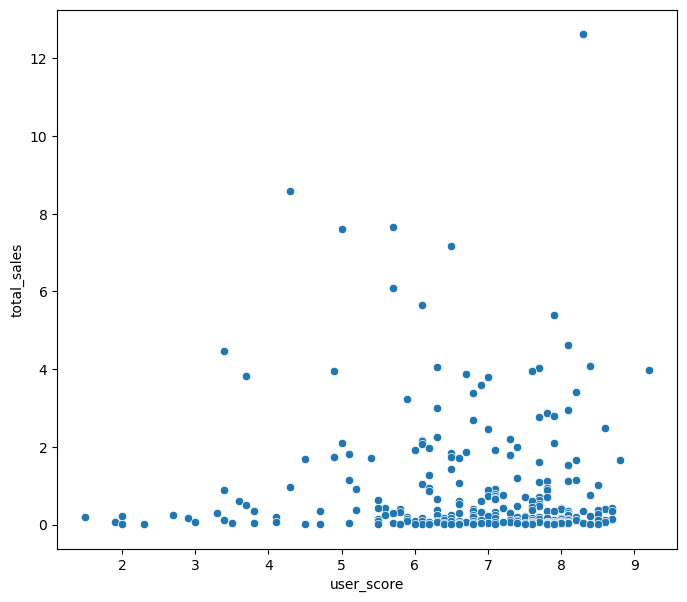

In [93]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.scatterplot(data=PS4_us, x='user_score', y='total_sales')
plt.title = 'PS4 User Score VS Total Sales'
plt.show()

We may conclude by plot that there is no definite correlation between user score and total_sales. Let's check correlation coefficient:

In [94]:
PS4_us.corr()

,user_score,total_sales
user_score,1.000000,-0.031957
total_sales,-0.031957,1.000000


Correlation coefficient is around 0, so there is no correlation between user score in reviews and sales.

## Compare the sales of the same games on other platforms.


Let's find the most frequent(popular) platforms and choose the first 5 of them to compare correlation:

In [95]:
data_new.stb.freq(['platform'],style=True, cum_cols=True)

,platform,count,percent,cumulative_count,cumulative_percent
0,PS4,392,17.52%,392,17.52%
1,PSV,358,16.00%,750,33.53%
2,PS3,345,15.42%,"1,095",48.95%
3,3DS,303,13.54%,"1,398",62.49%
4,XOne,247,11.04%,"1,645",73.54%
5,PC,192,8.58%,"1,837",82.12%
6,X360,186,8.31%,"2,023",90.43%
7,WiiU,115,5.14%,"2,138",95.57%
8,PSP,68,3.04%,"2,206",98.61%
9,Wii,23,1.03%,"2,229",99.64%


Based on analysis of correlation between scores and sales on PS4 done erlier, let's define a function to analyse other platforms. Check top 3 popular platforms PSV, PS3, 3SD, XOne.

PSV critic_score
0.1317629272760905
Weak or no correlation between this score and sales
PSV user_score
0.013488756835886498
Weak or no correlation between this score and sales
PS3 critic_score
0.43227504599251043
Weak or no correlation between this score and sales
PS3 user_score
0.12781061204589392
Weak or no correlation between this score and sales
3DS critic_score
0.3482155517492979
Weak or no correlation between this score and sales
3DS user_score
0.22230511788401228
Weak or no correlation between this score and sales
XOne critic_score
0.4169983280084019
Weak or no correlation between this score and sales
XOne user_score
-0.06892505328279544
Weak or no correlation between this score and sales


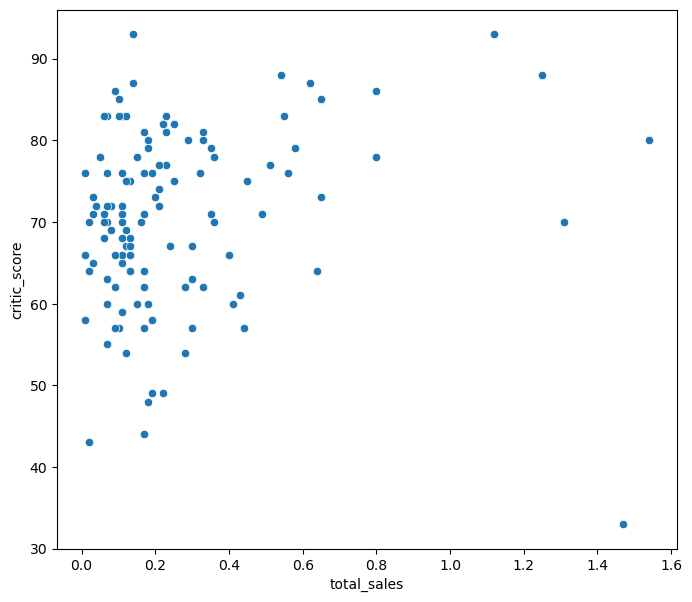

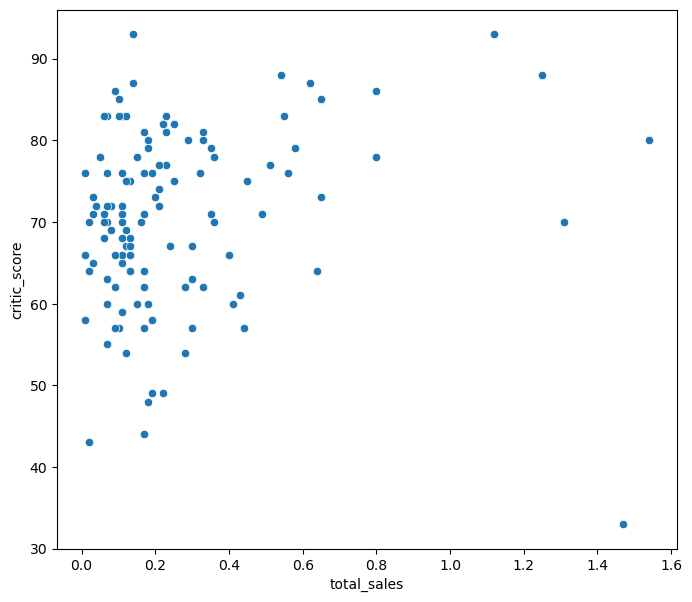

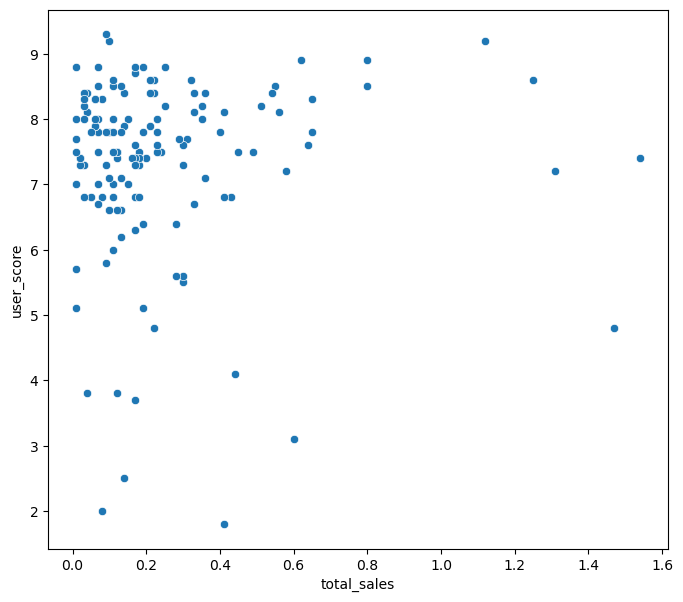

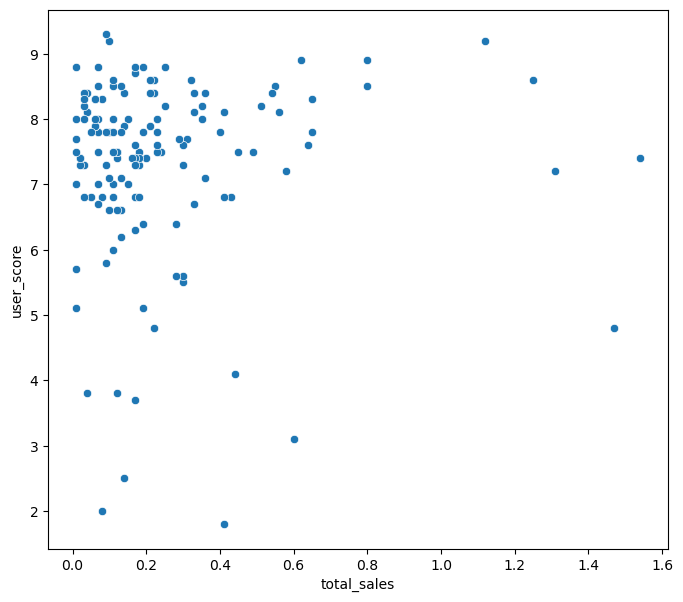

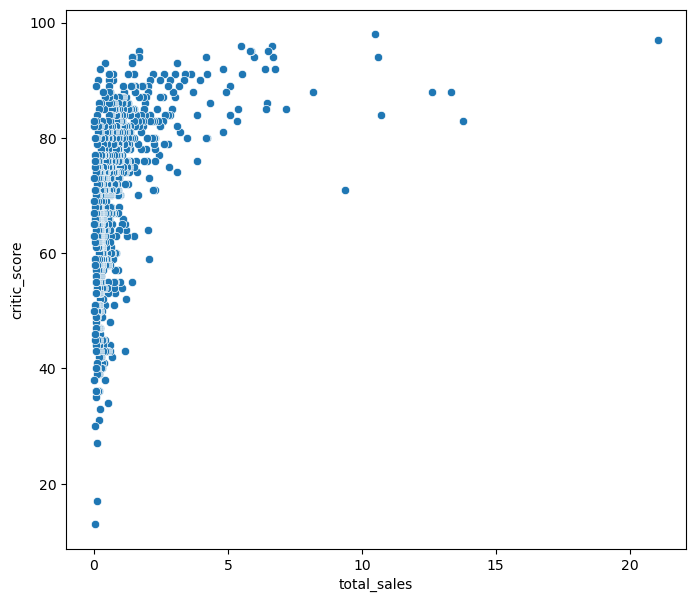

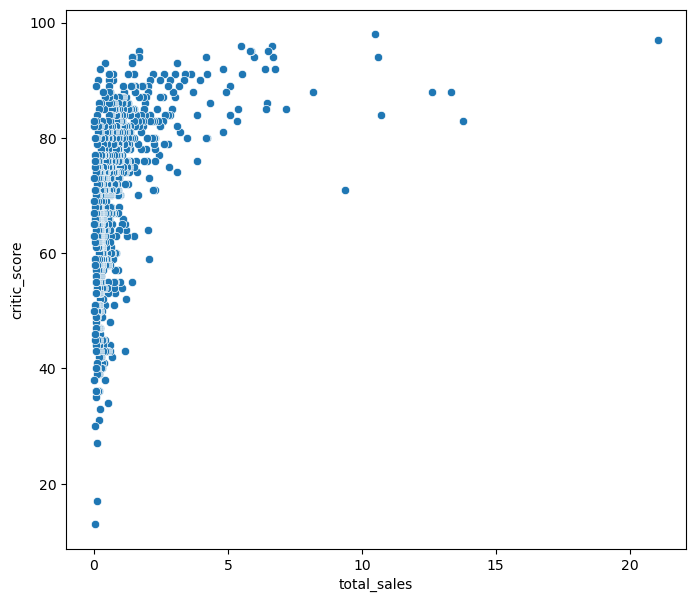

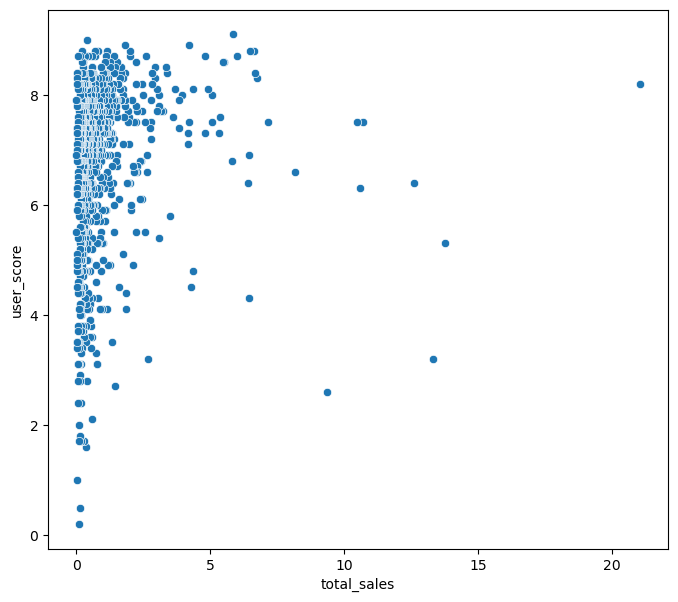

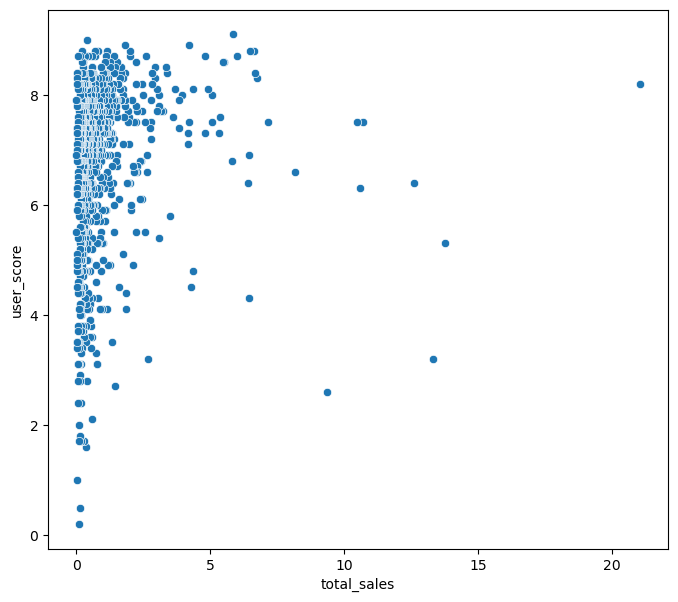

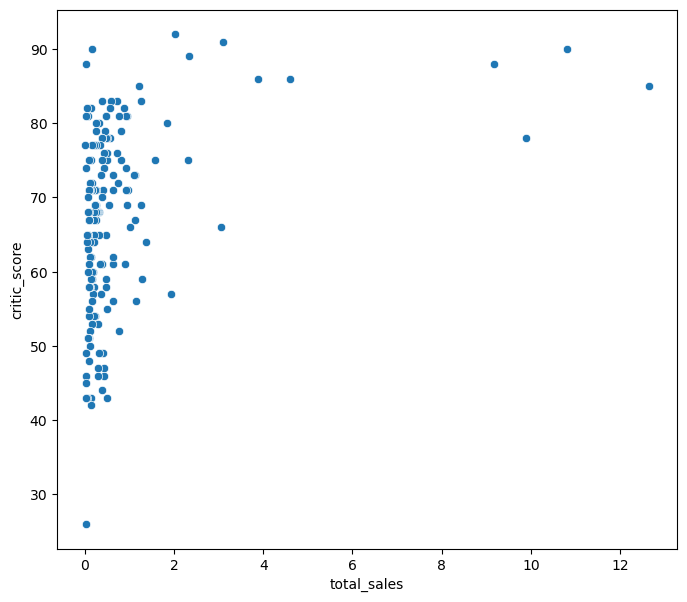

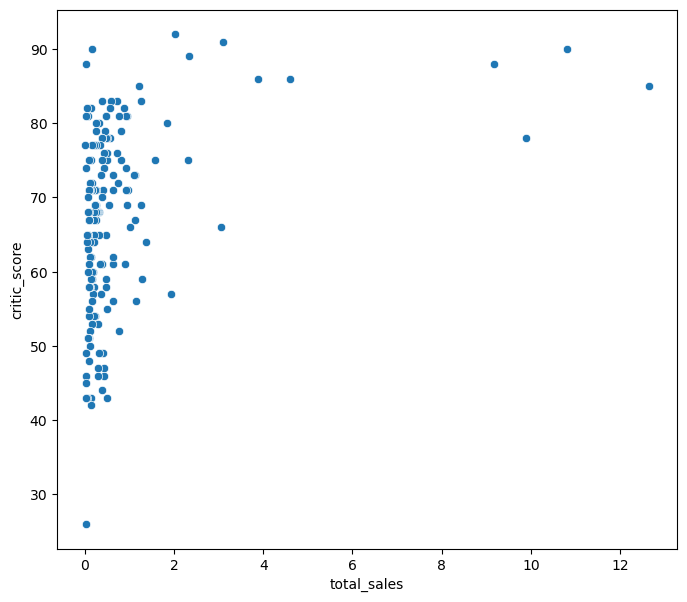

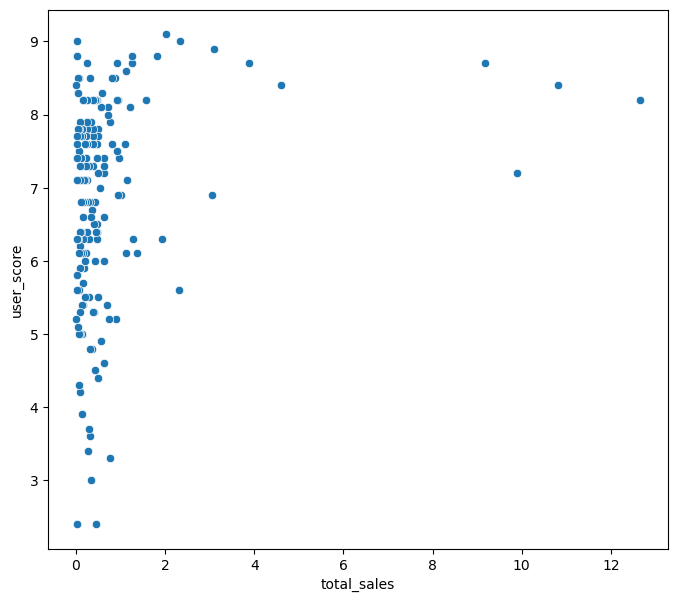

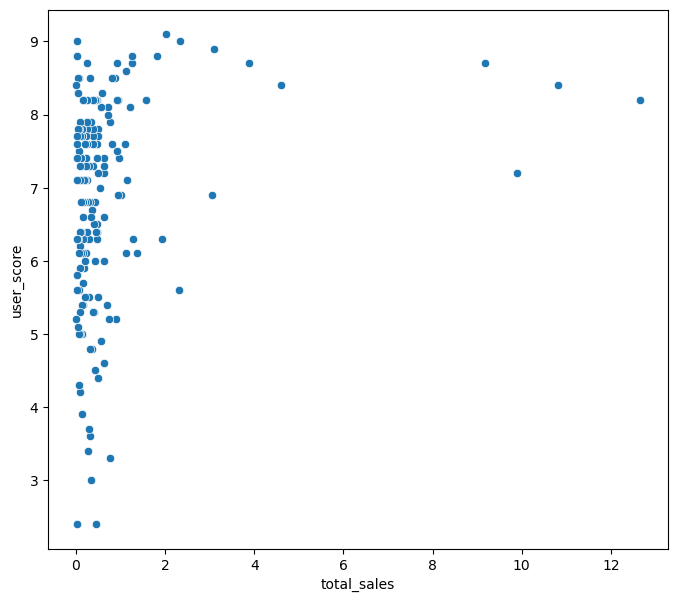

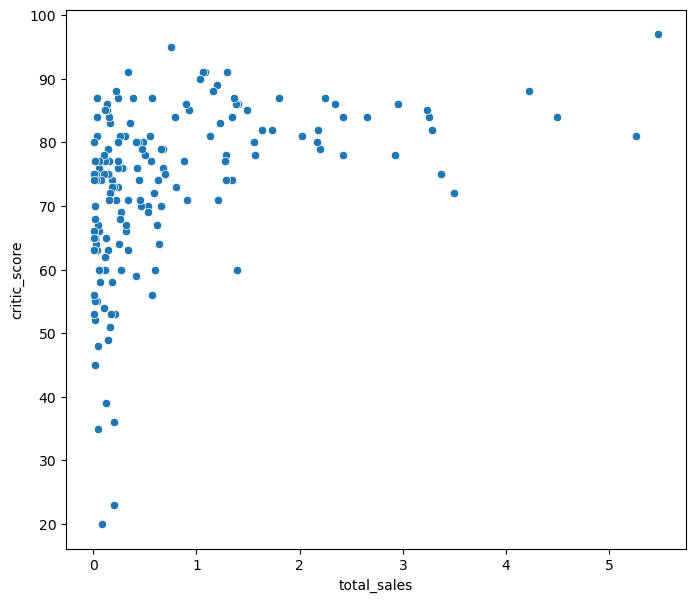

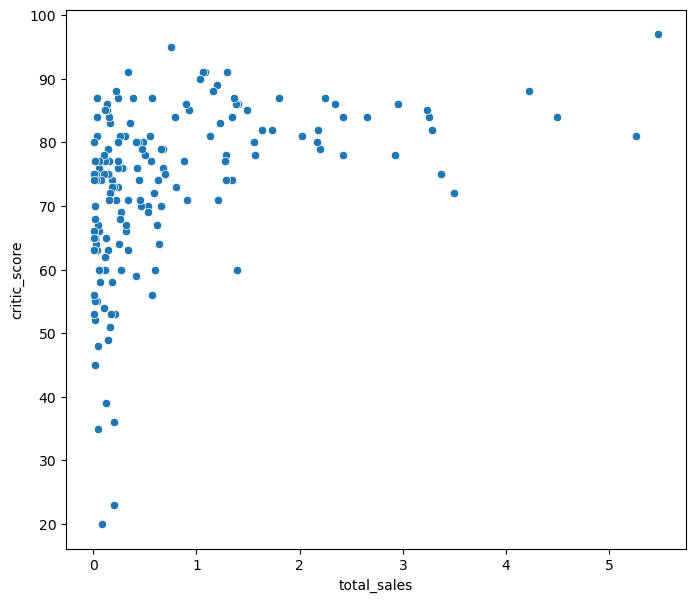

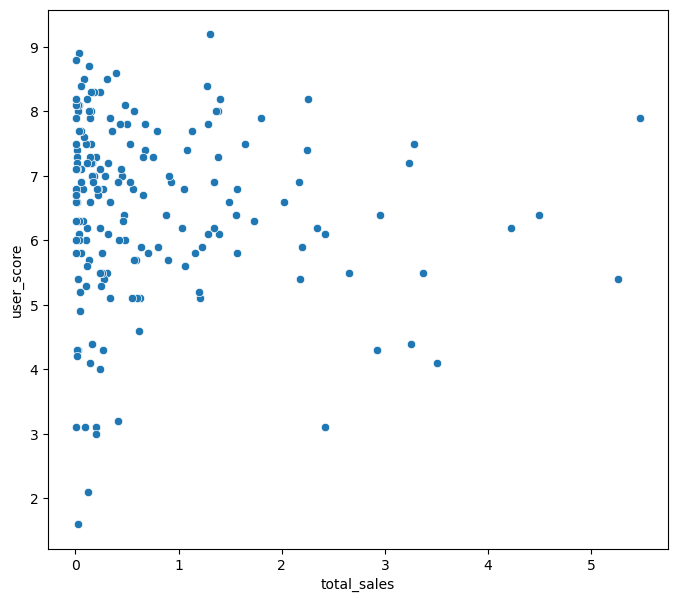

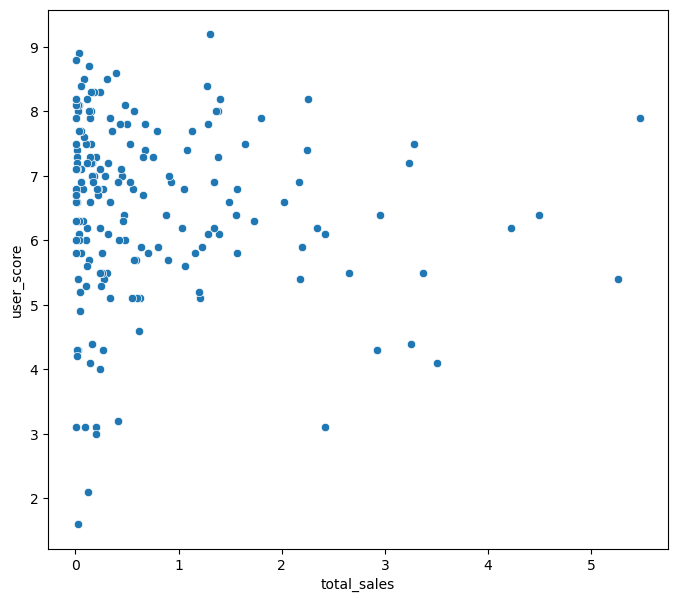

In [96]:
def score_effect(platform, score_type):
    new_df = data[(data.platform == platform) & (data[score_type].notna())][['total_sales', score_type]]
    fig, ax = plt.subplots(figsize=(8, 7))
    ax = sns.scatterplot(data=new_df, x='total_sales', y=score_type)
    correlation = new_df.corr().iloc[0, 1]  # Calculate correlation coefficient
    return correlation

platforms = ['PSV', 'PS3', '3DS', 'XOne']
col = ['critic_score', 'user_score']

future_df = []
for i in platforms:
    for x in col:
        print(i, x)
        future_df.append([i, x, score_effect(i, x)])
        print(score_effect(i,x))

        if future_df[-1][-1] > 0.7:
            result = 'Correlation is positive between this score and sales'
        else:
            result = 'Weak or no correlation between this score and sales'
        print(result)

**So**, for four most popular platforms PSV, PS3, 3SD, XOne, like for PS4, coefficient of correlation is less than 0.7(values for correlation with user_score are always significantly less than for critic_score),  scatterplots for platforms have much in common. There is no correlation between user score and total sales, though we can see weak positive correlation between critic score sales.

## General distribution of games by genre. 
What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [97]:
data_new.genre.describe()

count       2237
unique        12
top       Action
freq         769
Name: genre, dtype: object

There are 12 genres of games, most popular is Action. Let's find the most profitable genres.


In [98]:
df=data_new.groupby(['genre'])['total_sales'].agg(['sum','mean', 'median']).sort_values(by='sum', ascending=False).reset_index()
df

,genre,sum,mean,median
0,Action,322.50,0.419376,0.110
1,Shooter,232.98,1.245882,0.450
2,Sports,150.65,0.703972,0.240
3,Role-Playing,145.89,0.499623,0.125
4,Misc,63.06,0.404231,0.105
5,Platform,42.63,0.576081,0.225
6,Racing,39.89,0.469294,0.120
7,Fighting,35.31,0.441375,0.125
8,Adventure,23.64,0.096490,0.030
9,Simulation,21.76,0.350968,0.100


If we group data by genre, the most profitable genres are Action, Shooter and Sports, the last by total sales are  Puzzle and Strategy. 

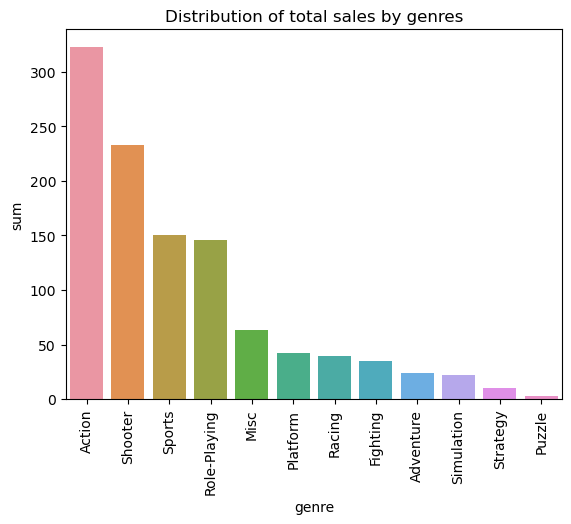

In [99]:
plot=sns.barplot(data=df, x="genre", y="sum")
plot.set(title="Distribution of total sales by genres")
plot.tick_params(axis= 'x', rotation=90)

Summed revenue from all Action games is much greater, than from any other genre. But if we look at mean and median values, the situation is different.

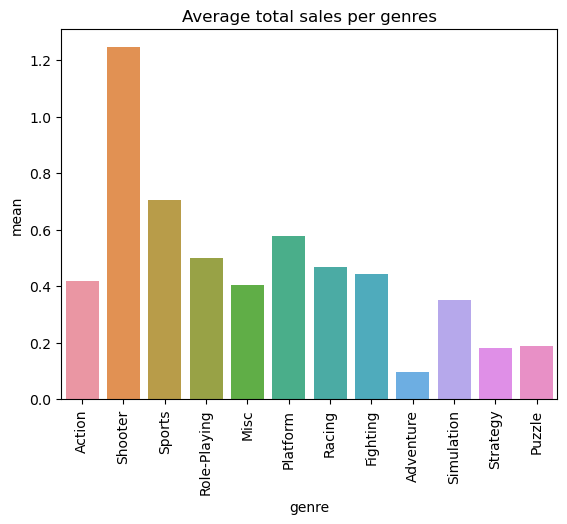

In [100]:
plot=sns.barplot(data=df, x="genre", y="mean")
plot.set(title="Average total sales per genres")
plot.tick_params(axis= 'x', rotation=90)

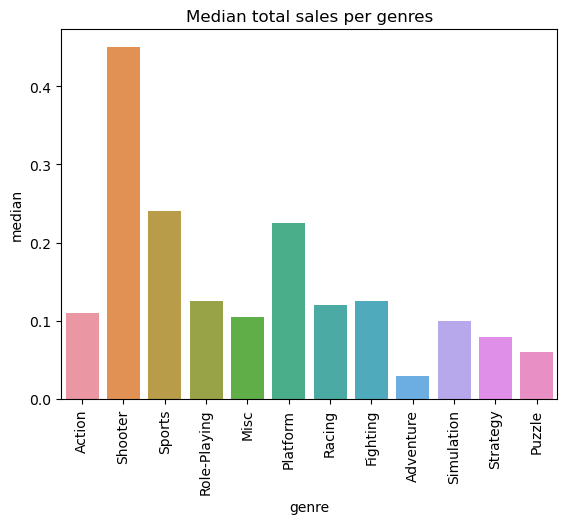

In [101]:
plot=sns.barplot(data=df, x="genre", y="median")
plot.set(title="Median total sales per genres")
plot.tick_params(axis= 'x', rotation=90)

Mean and median values for total sales are the biggers for Shooter, the second and the third are Sports and Platform, the last is Adventure. Action is only on the 7 place! There's sometimes a difference between order by mean and median ratings(Strategy/Puzzle, Racing/Fighting), but it's not so big. We may suppose that this is due to outliers. Let's make boxplots to check it.

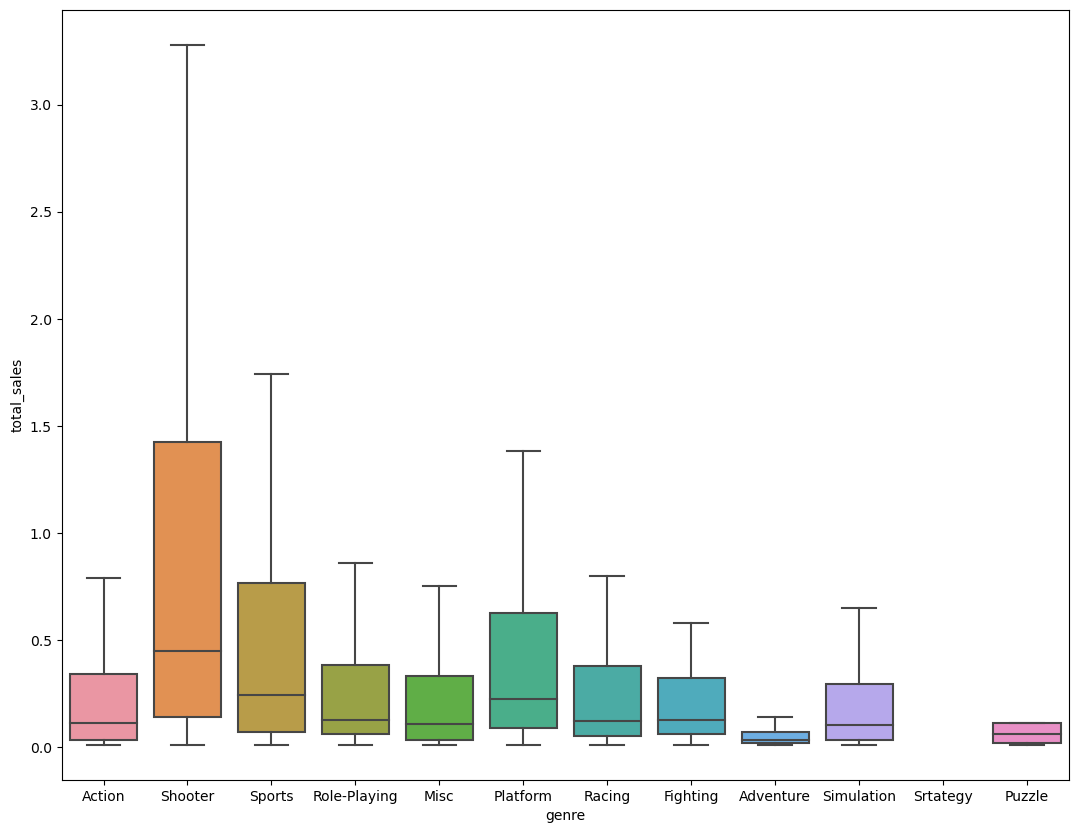

In [102]:

plt.figure(figsize=(13, 10))
order = ['Action','Shooter', 'Sports', 'Role-Playing', 'Misc' , 'Platform','Racing', 'Fighting', 'Adventure','Simulation', 'Srtategy', 'Puzzle']  # Specify the desired order of categories

sns.boxplot(x='genre', y='total_sales', data=data_new, order=order, showfliers = False)
plt.show()

The boxplot proves that on  individual basis Shooter games have the greatest total sales, it also has many expensive outliers. So on  individual basis top 3 genres are Shooter, Sports, Platform, then come Role-playing, Racing, Action.

Let's compare how are genres spread over the platforms.

In [103]:
data_new.groupby(['genre'])['platform'].nunique()

genre
Action          11
Adventure       11
Fighting         9
Misc            11
Platform        10
Puzzle           5
Racing           7
Role-Playing     9
Shooter          8
Simulation      10
Sports          11
Strategy        10
Name: platform, dtype: int64

Number of platforms is the smalles for Puzzle(5), the least profitable genre, but max number of platforms(11) is caracteristic of not only the most profitable Action, but also Adventure, Sports, Misc genres as well. Strategy(one of the least profitable genres) is spread over 10 platforms, and Shooler(individual offset leader) only 8.

Let's compare number of games per genre.

In [104]:
data_new.groupby(['genre'])['name'].nunique().sort_values(ascending=False)

genre
Action          402
Role-Playing    207
Adventure       179
Misc            102
Shooter          76
Sports           75
Simulation       48
Fighting         47
Strategy         42
Platform         37
Racing           36
Puzzle           12
Name: name, dtype: int64

Yes, Action goes far ahead and has max number of different games(402), while Shooter has only  76 names. Less profitable usually have smaller number of different games, but the dependansy is not so strong(e.g. Adventure).



Compare ratings for genres:

In [105]:
data_new.groupby(['genre'])['rating'].unique()

genre
Action          [M, unknown, T, E, E10+]
Adventure       [M, unknown, E, E10+, T]
Fighting           [unknown, M, T, E10+]
Misc            [unknown, E10+, E, T, M]
Platform           [E, E10+, unknown, T]
Puzzle                [E, E10+, unknown]
Racing          [E, unknown, E10+, T, M]
Role-Playing    [unknown, M, T, E, E10+]
Shooter            [unknown, M, T, E10+]
Simulation         [unknown, E, T, E10+]
Sports             [E, E10+, T, unknown]
Strategy        [T, E10+, M, E, unknown]
Name: rating, dtype: object

The least profitable genre Puzzle has also min number of ratings, while max number of ratings is seen not only in Action, but other 5 genres asa well, including Strategy.

**Conclusion**

- Number of games per year grew since 1993 and reached maximum in 2008, after that began to go down. Old data are not so relevant, the most important years to predict the sitution in 2017 are since 2012.
- Top3 platforms by total sales: PS2, X360, PS3. PS2 has max total sales for the whole observation period, but now it's out of sale. Then other platforms arise and get more total sales. Each game has its own 'life cycle'.
- Model "age" was determined as differense between its max and min value for year of release. Most often platforms live for about 7.5 years, though some most popular models live up to 16 years. Distribution of all models' total_sales over the years was visualised with lineplot. Older models are no more relevant for current market situation.
- For 'new' platforms(released in 2013 and later) total sales per year were examined.  In 2013 PS3 and X360 were leading in sales, in 2014 PS4 pulled ahead and remained the leader  in 2015 and 2016. Difference between years was found that shows positive or negative dynamics in sales, heatmap was plotted. In 2016 there are no platforms with positive dynamics. Potentially profitable platforms are DS (two years of 0 dynamics), PSP, Wii, PSV.
-To study how user and professional reviews affect sales platform X360 was taken. Scatterplot and correlation coefficient(0.4) show weak positive correlation between critic score and total sales. There is no correlation between user score and total_sales(-0.03).
- A function was written to calculate correlation between critic or user score and platform sales and to build a scatterpot. for four most popular platforms PSV, PS3, 3SD, XOne, like for PS4, coefficient of correlation is less than 0.7(values for correlation with user_score are always significantly less than for critic_score),  scatterplots for platforms have much in common. There is no correlation between user score and total sales, though we can see weak positive correlation between critic score and sales.
- If we group data by genre, the most profitable  are Action, Shooter and Sports VS the least are  Puzzle and Strategy, they get min summed total sales. Summed revenue from all Action games is much greater, than from any other genre. But Mean and median values for total sales are distributed differently: the leading genre is Shooter, the second and the third are Sports and Platform, the last is Adventure. Genres have many outliers  - games bringing higher sales, which shift the whole picture. So on  individual basis top 3 genres are Shooter, Sports, Platform, then come Role-playing, Racing, Action.  Regarding boxplot, mean and median values Action is only on the 7 place, but it has max number of games, spread over max number of platforms and is recomended for max number of rating categories, that leads to max summed  total sales. The least profitable genre Puzzle has also min number of game names, platforms and ratings.

# Step 4. User profile for each region


## Top five platforms. 
Describe variations in their market shares from region to region.



Lets investigate North American market.

In [106]:
na=data_new.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()
na

,platform,na_sales
4,PS4,108.74
10,XOne,93.12
9,X360,81.66
3,PS3,63.50
0,3DS,38.20


The most profitable platforms in North America since 2013 are PS4, XOne, X360, PS3, 3DS.

The most profitable platforms on the European market:

In [107]:
eu=data_new.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu

,platform,eu_sales
4,PS4,141.09
3,PS3,67.81
10,XOne,51.59
9,X360,42.52
0,3DS,30.96


Top 5 platforms in Europe: PS4, PS3, XOne, X360, 3DS

The most profitable platforms in Japan:

In [108]:
jp=data_new.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp

,platform,jp_sales
0,3DS,67.81
3,PS3,23.35
6,PSV,18.59
4,PS4,15.96
8,WiiU,10.88


Top 5 platforms in Japan: 3DS, PS3, PSV, PS4, WiiU.

Na and EU market are closer to each other, they have the same top platforms(only the order differs). Japan has 3 platforms in common with NA and EU and  2 special platforms - PSV and WiiU.

Let's merge top 5 platforms in one table.

In [109]:
comb=na.merge(eu,how='outer',on=['platform'])
comb

,platform,na_sales,eu_sales
0,PS4,108.74,141.09
1,XOne,93.12,51.59
2,X360,81.66,42.52
3,PS3,63.50,67.81
4,3DS,38.20,30.96


In [110]:
combb=comb.merge(jp,how='outer',on=['platform'])
combb

,platform,na_sales,eu_sales,jp_sales
0,PS4,108.74,141.09,15.96
1,XOne,93.12,51.59,NaN
2,X360,81.66,42.52,NaN
3,PS3,63.50,67.81,23.35
4,3DS,38.20,30.96,67.81
5,PSV,NaN,NaN,18.59
6,WiiU,NaN,NaN,10.88


Let's make a table for sales in all 3 regions by platform to count a share.

In [111]:
all_rev=data_new.groupby(['platform'])[['na_sales','eu_sales','jp_sales']].sum()
all_rev

,na_sales,eu_sales,jp_sales
platform,,,
3DS,38.20,30.96,67.81
DS,0.57,0.85,0.00
PC,11.19,25.84,0.00
PS3,63.50,67.81,23.35
PS4,108.74,141.09,15.96
PSP,0.00,0.17,3.53
PSV,5.04,6.10,18.59
Wii,6.56,5.93,0.05
WiiU,29.21,19.85,10.88


Let's find their market shares.

In [112]:
all_rev['na_sales%']=all_rev['na_sales']/all_rev['na_sales'].sum()
all_rev['eu_sales%']=all_rev['eu_sales']/all_rev['eu_sales'].sum()
all_rev['jp_sales%']=all_rev['jp_sales']/all_rev['jp_sales'].sum()
all_rev = all_rev.sort_values(by='na_sales',ascending=False).reset_index()
all_rev

,platform,na_sales,eu_sales,jp_sales,na_sales%,eu_sales%,jp_sales%
0,PS4,108.74,141.09,15.96,0.248384,0.359273,0.113175
1,XOne,93.12,51.59,0.34,0.212705,0.131369,0.002411
2,X360,81.66,42.52,0.51,0.186528,0.108273,0.003617
3,PS3,63.50,67.81,23.35,0.145047,0.172672,0.165579
4,3DS,38.20,30.96,67.81,0.087256,0.078837,0.480854
5,WiiU,29.21,19.85,10.88,0.066721,0.050546,0.077152
6,PC,11.19,25.84,0.00,0.025560,0.065799,0.000000
7,Wii,6.56,5.93,0.05,0.014984,0.015100,0.000355
8,PSV,5.04,6.10,18.59,0.011512,0.015533,0.131825
9,DS,0.57,0.85,0.00,0.001302,0.002164,0.000000


Platforms market shares vary from region to region.
Platforms used in NA and Europe are the same.  2 platforms are missing in Japan, but is present in NA and Europe - PS and DS. 
Adding what was said earlier about top 5 platforms, **NA and European market are closer to each other, than to Japan**.
Let's visualize it with barplot.


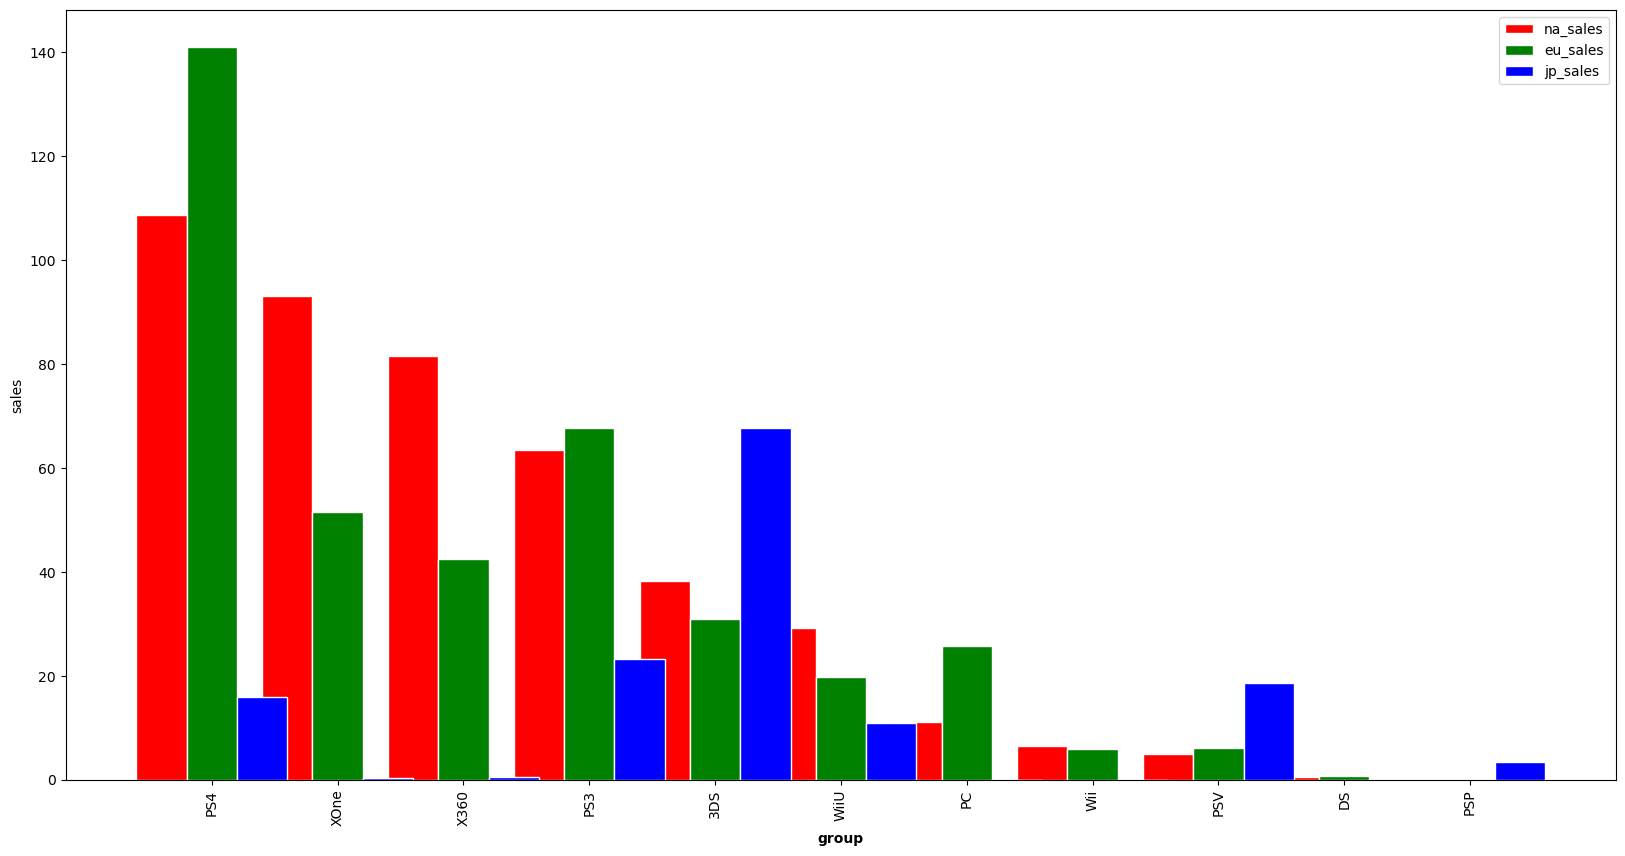

In [113]:
plt.figure(figsize=(20, 10))
barWidth = 0.4
# set heights of bars
bars1 = all_rev['na_sales']
bars2 = all_rev['eu_sales']
bars3 = all_rev['jp_sales']
r1 = range(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + 2*barWidth for x in r1]
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='na_sales')
plt.bar(r2, bars2, color='green', width=barWidth, edgecolor='white', label='eu_sales')
plt.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label='jp_sales')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], all_rev['platform'],rotation=90)
plt.ylabel('sales')
plt.legend()
plt.show()

Top 5 platforms differ much by sales the regions. Bar height reflecting total sales in absolute figures and it's share can be compared for each platform. For NA and EU the leader is PS4, in Japan the leader is 3DS.

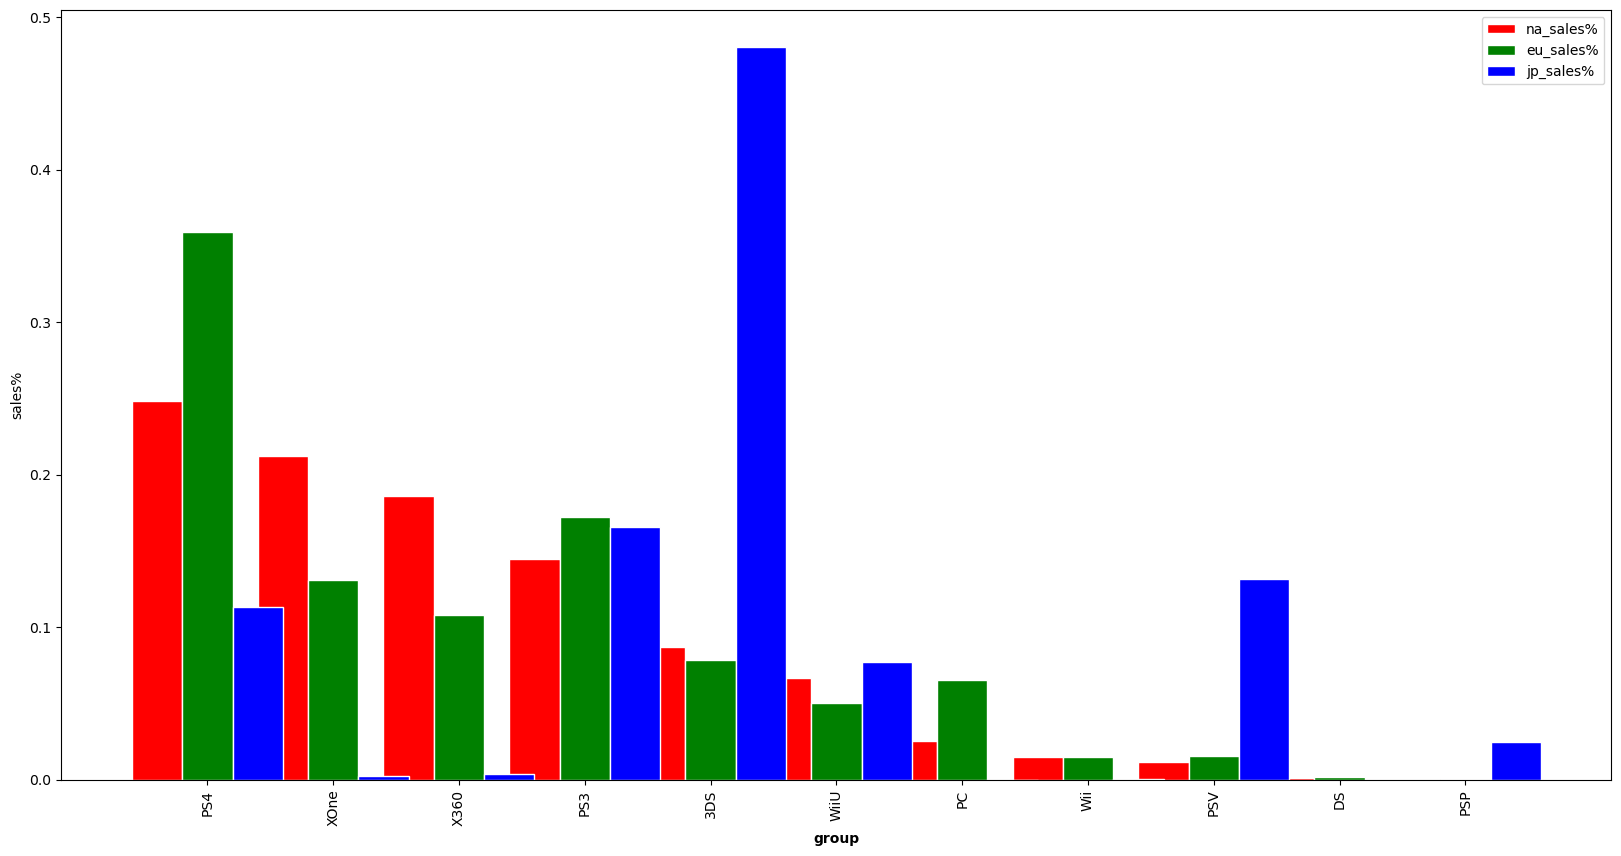

In [114]:
plt.figure(figsize=(20, 10))
barWidth = 0.4
# set heights of bars
bars1 = all_rev['na_sales%']
bars2 = all_rev['eu_sales%']
bars3 = all_rev['jp_sales%']
r1 = range(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + 2*barWidth for x in r1]
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='na_sales%')
plt.bar(r2, bars2, color='green', width=barWidth, edgecolor='white', label='eu_sales%')
plt.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label='jp_sales%')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], all_rev['platform'],rotation=90)
plt.ylabel('sales%')
plt.legend()
plt.show()

Market share bars for platforms clearly show which platforms are more important for the region market and how the regions differ in the aspect. Let's check coefficient of correlation:

In [115]:
all_rev.corr()

,na_sales,eu_sales,jp_sales,na_sales%,eu_sales%,jp_sales%
na_sales,1.000000,0.865403,0.083721,1.000000,0.865403,0.083721
eu_sales,0.865403,1.000000,0.152463,0.865403,1.000000,0.152463
jp_sales,0.083721,0.152463,1.000000,0.083721,0.152463,1.000000
na_sales%,1.000000,0.865403,0.083721,1.000000,0.865403,0.083721
eu_sales%,0.865403,1.000000,0.152463,0.865403,1.000000,0.152463
jp_sales%,0.083721,0.152463,1.000000,0.083721,0.152463,1.000000


Correlation of distribution of sales per platform between NA and EU is very high - 0.86. No correlation found between NA and JP - 0.09, EU and JP - 0.15.

## The top five genres. 
Explain the difference.

Let's find the most profitable genres in 3 regions.

In [116]:
na=data_new.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False).head()
na

,genre,na_sales
0,Action,126.13
8,Shooter,109.74
10,Sports,65.27
7,Role-Playing,46.40
3,Misc,27.49


In [117]:
eu=data_new.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False).head()
eu

,genre,eu_sales
0,Action,118.61
8,Shooter,87.86
10,Sports,60.52
7,Role-Playing,36.97
6,Racing,20.19


In [118]:
jp=data_new.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False).head()
jp

,genre,jp_sales
7,Role-Playing,51.04
0,Action,40.49
3,Misc,9.44
2,Fighting,7.65
8,Shooter,6.61


Merge top 5 for all regions in one table.

In [119]:
comb=na.merge(eu,how='outer',on=['genre'])
comb

,genre,na_sales,eu_sales
0,Action,126.13,118.61
1,Shooter,109.74,87.86
2,Sports,65.27,60.52
3,Role-Playing,46.40,36.97
4,Misc,27.49,NaN
5,Racing,NaN,20.19


In [120]:
combb=comb.merge(jp,how='outer',on=['genre'])
combb

,genre,na_sales,eu_sales,jp_sales
0,Action,126.13,118.61,40.49
1,Shooter,109.74,87.86,6.61
2,Sports,65.27,60.52,NaN
3,Role-Playing,46.40,36.97,51.04
4,Misc,27.49,NaN,9.44
5,Racing,NaN,20.19,NaN
6,Fighting,NaN,NaN,7.65


Action, Shooter, Sports and Role-Playing genres are most popular in NA and EU, while only 3 of them are present in japanese top 5. JP has also 1 genre in common with NA - Misc. 
Number of common genres in top5:
NA-EU: 4
NA-JP: 4
EU-JP: 3.
This number can be a rough estimate of distance between markets, but maybe we need correlational analysis.

Let's group data by genre and chose region sales.

In [121]:
all_genre=data_new.groupby(['genre'])[['na_sales','eu_sales','jp_sales']].sum().sort_values(by='na_sales', ascending=False).reset_index()
all_genre

,genre,na_sales,eu_sales,jp_sales
0,Action,126.13,118.61,40.49
1,Shooter,109.74,87.86,6.61
2,Sports,65.27,60.52,5.41
3,Role-Playing,46.40,36.97,51.04
4,Misc,27.49,20.04,9.44
5,Platform,18.14,15.58,4.79
6,Fighting,15.55,8.55,7.65
7,Racing,12.96,20.19,2.30
8,Adventure,7.14,8.25,5.82
9,Simulation,4.86,10.92,4.52


Let's calculate each genre's share in the region's market:

In [122]:
all_genre['na_sales%']=all_genre['na_sales']/all_genre['na_sales'].sum()
all_genre['eu_sales%']=all_genre['eu_sales']/all_genre['eu_sales'].sum()
all_genre['jp_sales%']=all_genre['jp_sales']/all_genre['jp_sales'].sum()
all_genre = all_genre.sort_values(by='na_sales',ascending=False)
all_genre

,genre,na_sales,eu_sales,jp_sales,na_sales%,eu_sales%,jp_sales%
0,Action,126.13,118.61,40.49,0.288106,0.302029,0.287122
1,Shooter,109.74,87.86,6.61,0.250668,0.223727,0.046873
2,Sports,65.27,60.52,5.41,0.149090,0.154109,0.038363
3,Role-Playing,46.40,36.97,51.04,0.105987,0.094141,0.361934
4,Misc,27.49,20.04,9.44,0.062793,0.051030,0.066941
5,Platform,18.14,15.58,4.79,0.041435,0.039673,0.033967
6,Fighting,15.55,8.55,7.65,0.035519,0.021772,0.054248
7,Racing,12.96,20.19,2.30,0.029603,0.051412,0.016310
8,Adventure,7.14,8.25,5.82,0.016309,0.021008,0.041271
9,Simulation,4.86,10.92,4.52,0.011101,0.027807,0.032052


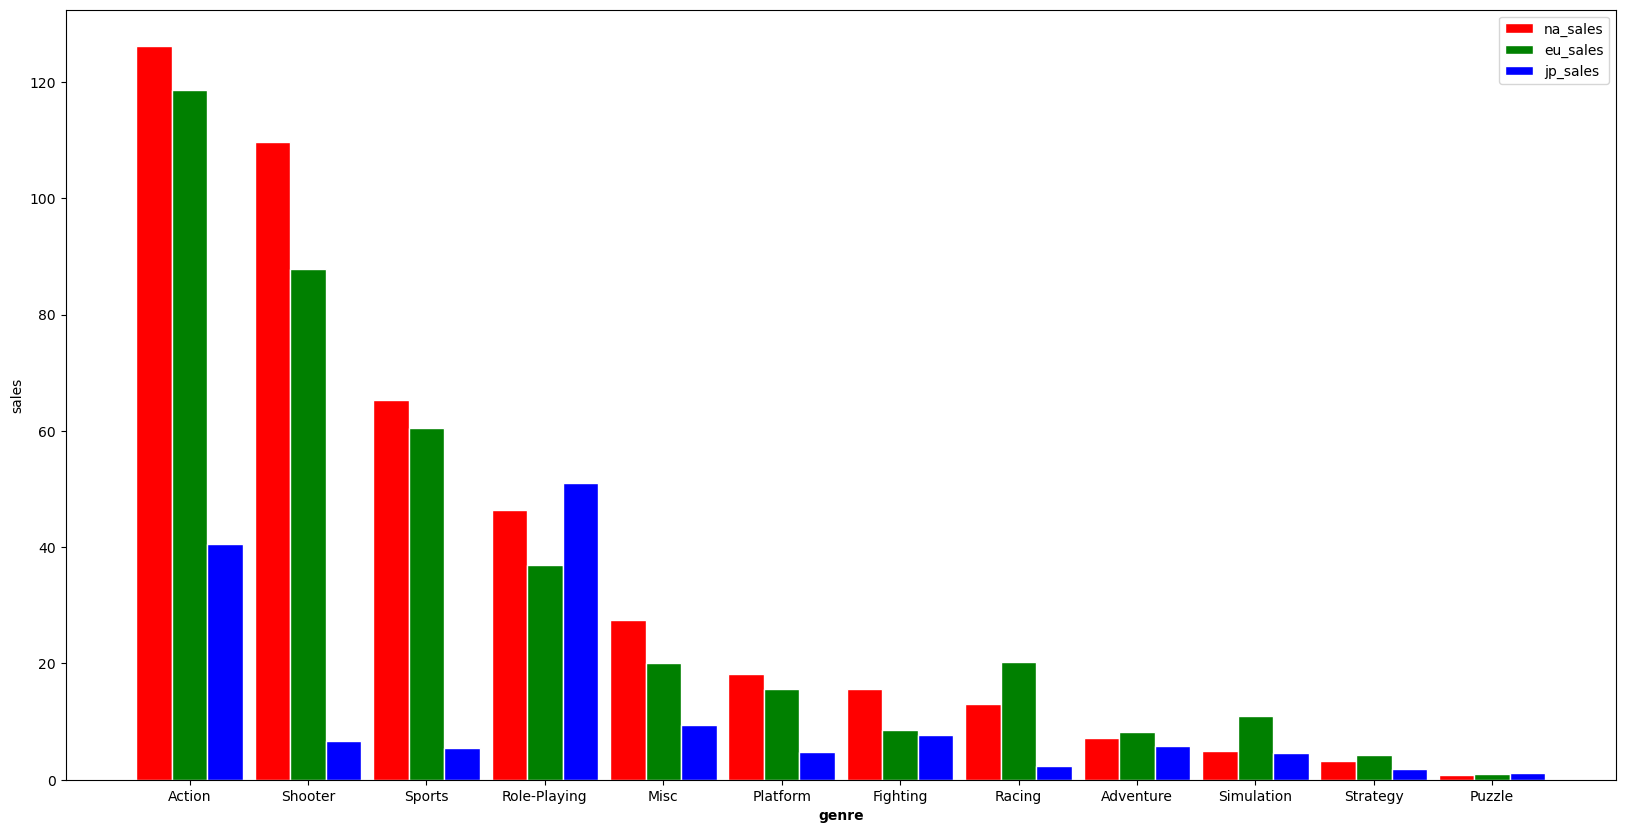

In [123]:
plt.figure(figsize=(20, 10))
barWidth = 0.3
# set heights of bars
bars1 = all_genre['na_sales']
bars2 = all_genre['eu_sales']
bars3 = all_genre['jp_sales']
r1 = range(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + 2*barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='na_sales')
plt.bar(r2, bars2, color='green', width=barWidth, edgecolor='white', label='eu_sales')
plt.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label='jp_sales')
 
# Add xticks on the middle of the group bars
plt.xlabel('genre', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], all_genre['genre'])
plt.ylabel('sales')
plt.legend()
plt.show()

This plot visualizes differences between sales per genre and per region. NA and EU platform bars decrease almost synchronously, while JP bars go up at Role-Playing genre. Let's make barplot for shares in the market.

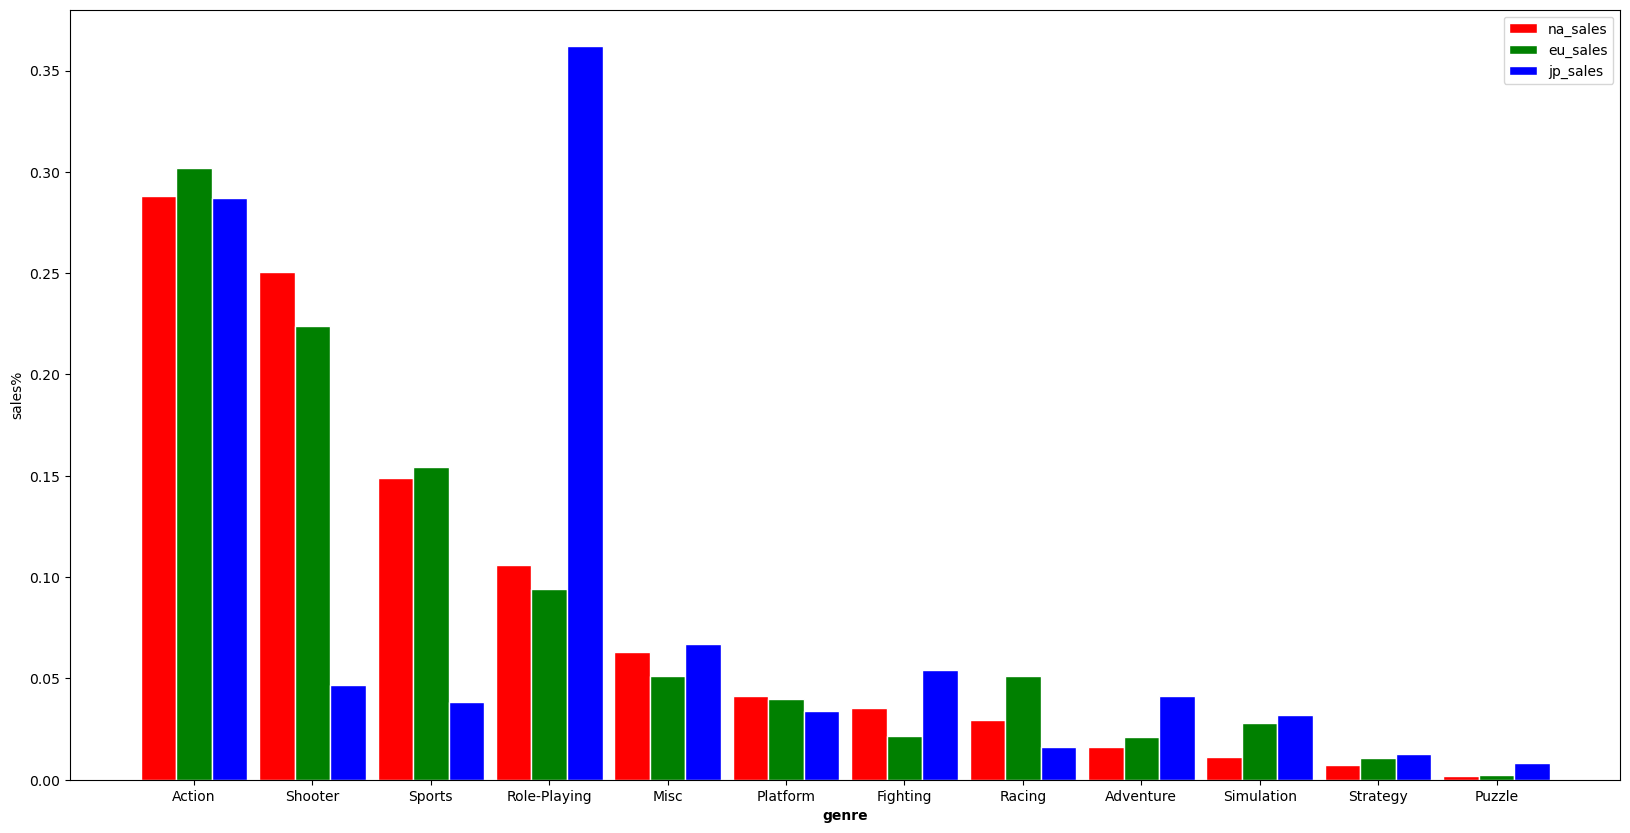

In [124]:
plt.figure(figsize=(20, 10))
barWidth = 0.3
# set heights of bars
bars1 = all_genre['na_sales%']
bars2 = all_genre['eu_sales%']
bars3 = all_genre['jp_sales%']
r1 = range(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + 2*barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='na_sales')
plt.bar(r2, bars2, color='green', width=barWidth, edgecolor='white', label='eu_sales')
plt.bar(r3, bars3, color='blue', width=barWidth, edgecolor='white', label='jp_sales')
 
# Add xticks on the middle of the group bars
plt.xlabel('genre', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], all_genre['genre'])
plt.ylabel('sales%')
plt.legend()
plt.show()

Here the specifics of japanese market is more clear: share of Role-Playing is much greater than that of other genres, while in NA and EU shares of top genres(Action, Sports and Shooter) don't stand up so sharply from others.

As values in genre are strings, we can't find correlation coefficient for it, but other columns contain numerical values, so let's examine all correlation coefficients:

In [125]:
all_genre.corr()

,na_sales,eu_sales,jp_sales,na_sales%,eu_sales%,jp_sales%
na_sales,1.000000,0.989469,0.522670,1.000000,0.989469,0.522670
eu_sales,0.989469,1.000000,0.520593,0.989469,1.000000,0.520593
jp_sales,0.522670,0.520593,1.000000,0.522670,0.520593,1.000000
na_sales%,1.000000,0.989469,0.522670,1.000000,0.989469,0.522670
eu_sales%,0.989469,1.000000,0.520593,0.989469,1.000000,0.520593
jp_sales%,0.522670,0.520593,1.000000,0.522670,0.520593,1.000000


Sales by rating in NA and Europe are very simillar (corr.0.99), but Japanese market is rather special, it's correlation with NA and EU sales by rating smaller (0.52, 0.52).

## Do ESRB ratings affect sales in individual regions?

In [126]:
all_rat=data_new.groupby(['rating'])[['na_sales','eu_sales','jp_sales']].sum().reset_index()
all_rat

,rating,na_sales,eu_sales,jp_sales
0,E,79.05,83.36,15.14
1,E10+,54.24,42.69,5.89
2,M,165.29,145.80,14.11
3,T,49.79,41.95,20.59
4,unknown,89.42,78.91,85.29


Sales were grouped by rating, and now we add a share of sales:

In [127]:
all_rat['na_sales%']=all_rat['na_sales']/all_rat['na_sales'].sum()
all_rat['eu_sales%']=all_rat['eu_sales']/all_rat['eu_sales'].sum()
all_rat['jp_sales%']=all_rat['jp_sales']/all_rat['jp_sales'].sum()
all_rat.sort_values(by='na_sales',ascending=False)

,rating,na_sales,eu_sales,jp_sales,na_sales%,eu_sales%,jp_sales%
2,M,165.29,145.80,14.11,0.377555,0.371266,0.100057
4,unknown,89.42,78.91,85.29,0.204253,0.200937,0.604808
0,E,79.05,83.36,15.14,0.180566,0.212269,0.107361
1,E10+,54.24,42.69,5.89,0.123895,0.108706,0.041767
3,T,49.79,41.95,20.59,0.113730,0.106822,0.146008


We remember the meaning of rating letters:

2- E - everyone
3- E10+ - for ages 10 and older
4- T - Teenager
5- M - Mature(17+)


So, rating M gives max share of sales in NA and EU regions, NA and EU come ratings  'unknown' and  E, E10+, T. 
In JP max sales are 'unknown' , then Teenager's, E, M, E10+. 

Let's find correlation coefficient to check rating-sales dependancy.

In [128]:
all_rat.corr()

,na_sales,eu_sales,jp_sales,na_sales%,eu_sales%,jp_sales%
na_sales,1.000000,0.985551,0.025411,1.000000,0.985551,0.025411
eu_sales,0.985551,1.000000,0.016201,0.985551,1.000000,0.016201
jp_sales,0.025411,0.016201,1.000000,0.025411,0.016201,1.000000
na_sales%,1.000000,0.985551,0.025411,1.000000,0.985551,0.025411
eu_sales%,0.985551,1.000000,0.016201,0.985551,1.000000,0.016201
jp_sales%,0.025411,0.016201,1.000000,0.025411,0.016201,1.000000


There's strong positive correlation between rating and sales in NA and EU(0.98). No correlation found between these regions and JP:
0.025 for NA and JP,
0.016 for EU and JP. 

**Conclusion**. A user profile for each region since 2013 was examined.
- Top 5 platforms:
    - North America: PS4, XOne, X360, PS3, 3DS.
    - Europe: PS4, PS3, XOne, X360, 3DS.
    - Japan: 3DS, PS3, PSV, PS4, WiiU.

Na and EU market are closer to each other, they have the same top platforms(only the order differs). Japan has 3 platforms in common with NA and EU and  2 special platforms - PSV and WiiU.. Platforms used in NA and Europe are the same. 2 platforms are missing in Japan, but is present in NA and Europe - PS and DS. 
Barplots for sales by plaform in absolute values and in shares were created. **Correlation of distribution of sales per platform between NA and EU** is very high - 0.86. No correlation found between NA and JP - 0.09, EU and JP - 0.15.
- Top 5 genres:
    - NA: Action, Shooter,Sports, Role-Playing, Misc
    - EU:Action, Shooter,Sports, Role-Playing,Racing
    - JP: Role-Playing, Action, Misc, Fighting, Shooter
Barplots for sales by genre in absolute values and in shares were created, that visualize differences between sales per genre and per region. NA and EU platform bars decrease almost synchronously, while JP bars go up at Role-Playing genre.
Sales by rating in NA and Europe are very simillar (corr.0.99), but Japanese market is rather special, it's correlation with NA and EU sales by rating smaller (0.52, 0.52).
- ESBR rating affects sales: So, rating M gives max share of sales in NA and EU regions, NA and EU come ratings  'unknown' and  E, E10+, T. In JP max sales are 'unknown' , then Teenager's, E, M, E10+.
There's strong positive correlation between rating and sales in NA and EU(0.98). No correlation found between these regions and JP: 0.025 for NA and JP, 0.016 for EU and JP.


# Step 5. Test the following hypotheses:
## —Average user ratings of the Xbox One and PC platforms are the same.


Let's prepare samples for aXB nd PC plarforms:

In [129]:
xone=data_new[(data_new.platform=='XOne')&(data_new.user_score.notna())]['user_score'].astype(float)
xone

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64

In [130]:
pc=data_new[(data_new.platform=='PC')&(data_new.user_score.notna())]['user_score'].astype(float)
pc

458      3.9
1095     7.9
1351     2.2
1437     6.0
1530     5.4
        ... 
16456    8.3
16463    6.8
16509    7.9
16518    1.4
16692    7.6
Name: user_score, Length: 158, dtype: float64

Formulate null and alternative hypotheses:
**H0**: Average user ratings of the Xbox One and PC platforms are equal.
**H1**:Average user ratings of the Xbox One and PC platforms are not equal.

In order to test the hypothesis that the means of two statistical populations are equal based on samples taken from them, we apply the method scipy.stats.ttest_ind(). Let's set alpha = 0.05 - it's a critical statistical significance level: if the p-value is less than alpha, we reject H0. For the test we should know if the samples' variances are equal.

Let's use Levene test to find it out.

In [131]:
from scipy.stats import levene
stat, p = levene(xone, pc)
p<0.05

True

Use ttest_ind with equal_var parameter set to False.

In [132]:
from scipy import stats
stats.ttest_ind(xone, pc,equal_var=False)

Ttest_indResult(statistic=1.4027031463010626, pvalue=0.16174359801784316)

In [133]:
stats.ttest_ind(xone, pc).pvalue

0.15503167687396294

Set alpha to 0.05 and compare it with p-value.

In [134]:
stats.ttest_ind(xone, pc).pvalue<0.05

False

So we fail to reject H0 and have to **accept the hypothesis that average user ratings of the XOne and PC platforms are the same**.

Let's define function that will make t_test for 2 samples after estimating equal_var parameter.

In [135]:

def t_test(sample1,sample2,alpha=0.05):
    p_value_levene=stats.levene(sample1, sample2).pvalue
    if p_value_levene<alpha:
        option_var=False
    else:
        option_var=True
    p_value=stats.ttest_ind(sample1, sample2,nan_policy='omit',equal_var=option_var).pvalue
    if p_value<alpha:
        print('Reject H0: average of sample 1 is not equal to average of sample 2')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 \
  and sample 2 are not the same")

In [136]:
t_test(xone,pc,alpha=0.05)

Fail to Reject H0: We don't have enough evidence to say that averages of sample 1   and sample 2 are not the same


## Average user ratings for the Action and Sports genres are different.¶

First prepare samples. 

In [137]:
ac=data_new[(data_new.genre=='Action')&(data_new.user_score.notna())]['user_score'].astype(float)
ac

16       8.2
23       8.1
42       8.3
149      9.1
165      7.9
        ... 
16597    6.0
16652    8.5
16654    5.1
16660    6.7
16692    7.6
Name: user_score, Length: 392, dtype: float64

In [138]:
sp=data_new[(data_new.genre=='Sports')&(data_new.user_score.notna())]['user_score'].astype(float)
sp

77       4.3
94       5.0
126      4.3
143      5.7
264      4.5
        ... 
16142    8.8
16146    6.9
16450    4.5
16518    1.4
16643    6.6
Name: user_score, Length: 160, dtype: float64

**H0**: Average user rating of Action genre is equal to average user rating of Sports genre.
**H1**: Average user rating of Action genre is not equal to average user rating of Sports genre.
Alpha = 0.05
Use t_test function.

In [139]:
t_test(ac,sp,alpha=0.05)

Reject H0: average of sample 1 is not equal to average of sample 2


So, if we reject H0 about equality of the samples' averages, we have to **accept the hypothesis that Average user ratings for the Action and Sports genres are different**.

**Conclusion**:
We tested 2 hypotheses:
- Average user ratings of the XOne and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.

We failed to reject H0 in the first case, so we accept the hypothesis that average user ratings of the XOne and PC platforms are the same.
We rejected H0 in the second case and have to accept H1,  that Average user ratings for the Action and Sports genres are different.

# Step 6. General conclusion

The initial dataset contained 16715 rows 11 columns of data. The data was **prepared** for further analysis:
- Column names were made lowercase.
- Values in user score were converted to floats('tbd' wae treated like missing value).
- Missing  years of release  were restored(for about 125 games) or deleted (146 rows). Missing rating was replaced with 'unknown'. All missing values in critic_score and user_score were left without changing. 
- Two rows of data where the majority of values (including name and genre of the game) were missing were deleted. 
- Total sales were calculated and added in a separate column.


**Exploratoty data analysis** was conducted, the following results are obtained:
- **Number of games per year** grew since 1993 and reached maximum in 2008, after that began to go down. Old data are not so relevant, the most important years to predict the sitution in 2017 are since 2013.
- Top3 platforms by **total sales**: PS2, X360, PS3. PS2 has max total sales for the whole observation period, but now it's out of sale. Then other platforms arise and get more total sales. Each game has its own 'life cycle'.
- platform **"age"** was determined as differense between its max and min value for year of release. Most often platforms live for about 7.5 years, though some most popular platforms live up to 16 years. Older platforms are no more relevant for current market situation.
- For 'new' platforms(released in 2013 and later) **total sales per year** were examined.  In 2013 PS3 and X360 were leading in sales, in 2014 PS4 pulled ahead and remained the leader  in 2015 and 2016. **Positive or negative dynamics** from year to year was found. In 2016 there are no platforms with positive dynamics. **Potentially profitable platforms** are DS (two years of 0 dynamics), PSP, Wii, PSV.
- Platform X360 was taken to study how **user and professional reviews affect sales**. Scatterplot and correlation coefficient(0.4) show weak positive correlation between critic score and total sales. There is no correlation between user score and total_sales(-0.03).
- For analysing other platforms a special function was defined, correlation between scores and sales was calculated. Four most popular platforms PSV, PS3, 3SD, XOne, like for PS4, showed coefficiennt of correlation less than 0.7, values for correlation with user_score are always significantly less than for critic_score. There is no correlation between user score and total sales, though we can see weak positive correlation between critic score and sales.
- The general distribution of games by genre was studied. **Most profitable genres** are Action, Shooter and Sports VS the least are  Puzzle and Strategy, they get min summed total sales. Summed revenue from all Action games is much greater, than from any other genre. Order of genres by **mean and median values** for total sales is different: the leading genre is Shooter, the second and the third are Sports and Platform, the last is Adventure. Genres have many outliers bringing higher sales. So on  individual basis top 3 genres are Shooter, Sports, Platform, then come Role-playing, Racing, Action.  Regarding boxplot, mean and median values Action is only on the 7 place, but it has max number of games, spread over max number of platforms and is recomended for max number of rating categories, that leads to max summed  total sales. The least profitable genre Puzzle has also min number of game names, platforms and ratings.


**A user profile for each region was created**.
- **Top 5 profitable platforms**:
    - North America: PS4, XOne, X360, PS3, 3DS.
    - Europe: PS4, PS3, XOne, X360, 3DS.
    - Japan: 3DS, PS3, PSV, PS4, WiiU.
- Platforms market shares vary from region to region. Platforms used in NA and Europe are the same. There are 6 platforms which are present only on the Japanese market (not in NA, EU) - 3DO,PCFX,NG,GG,TG16,WS,though their share is not so big. One platform is missing in Japan, but is present in NA and Europe - 2600 platform.  NA and European market are closer to each other, than to Japan. Barplots for sales by plaform in absolute values and in shares were created. Correlation of distribution of sales per platform between NA and EU is very high - 0.86. No correlation found between NA and JP - 0.09, EU and JP - 0.15.

- **Top 5 genres**: 
    - NA: Action, Shooter,Sports, Role-Playing, Misc
    - EU:Action, Shooter,Sports, Role-Playing,Racing
    - JP: Role-Playing, Action, Misc, Fighting, Shooter
Barplots for sales by genre in absolute values and in shares were created, that visualize differences between sales per genre and per region. NA and EU platform bars decrease almost synchronously, while JP bars go up at Role-Playing genre.
Sales by rating in NA and Europe are very simillar (corr.0.99), but Japanese market is rather special, it's correlation with NA and EU sales by rating smaller (0.52, 0.52).
- **ESBR rating affects sales**:  rating M gives max share of sales in NA and EU regions, NA and EU come ratings  'unknown' and  E, E10+, T. In JP max sales are 'unknown' , then Teenager's, E, M, E10+.
There's strong positive correlation between rating and sales in NA and EU(0.98). No correlation found between these regions and JP: 0.025 for NA and JP, 0.016 for EU and JP.

**2 hypotheses were tested**:
- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.

Both hypotheses were accepted.